# Hematopoiesis data visualization

#### load libraries

In [32]:
from __future__ import division
from scipy import stats
from collections import OrderedDict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter,MaxNLocator
from matplotlib import rc
import scipy.io as sio
import h5py
import math
#import webcolors
import os
import random
import matplotlib.style

#### load some functions:

In [51]:
path = os.getcwd()
os.chdir(path)
%run "defined_functions.ipynb"

In [34]:
path

'D:\\Documents\\MATLAB\\HematopoieticDisorderAnalysis\\Python\\data_analysis'

#### specify if graphics should be saved:

In [35]:
opt_save = True

#### specify settings for plt graphics

In [36]:
loadPltSettings(25,20) #fontSize,markerSize

<module 'matplotlib.pyplot' from 'C:\\Users\\PowerWS\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

#### define colors

In [37]:
sns.set(style="whitegrid")
col_H = '#194795'
col_H_light = '#0F2F66'
col_H_y = '#57B8F9'
col_H_y_light = '#279DEC'
col_H_a = '#194795'
col_H_a_light = '#0F2F66'
col_MDS = '#C61D1D'
col_MDS_light = '#791010'
col_MDS_m1 = '#FD8002'
col_MDS_m2 = '#AD07E3'
col_MDS_m3 = '#FF0000'
col_MDS_m4 = '#FF3399'
col_MDS_m5 = '#813434'
col_MDS_m6 = '#FF0010'
col_MDS_m7 = '#813437'
col_MDS_m8 = '#834537'
col_CHIP = '#009999'
col_CHIP_light = '#00FFFF'

cols_H_vs_MDS = sns.color_palette([col_H,col_MDS])
cols_H_vs_MDS_light = sns.color_palette([col_H_light,col_MDS_light])
cols_H_vs_MDS_mut = sns.color_palette([col_H,col_MDS,col_MDS_m1,col_MDS_m2,col_MDS_m3,col_MDS_m4,col_MDS_m5,col_MDS_m6,col_MDS_m7,col_MDS_m8])

cols_H_y_vs_MDS = sns.color_palette([col_H_y,col_MDS])
cols_H_y_vs_MDS_light = sns.color_palette([col_H_y_light,col_MDS_light])

cols_H_y_vs_H_a = sns.color_palette([col_H_y, col_H_a])
cols_H_y_vs_H_a_light = sns.color_palette([col_H_y_light, col_H_a_light])

cols_H_y_vs_H_a_vs_MDS = sns.color_palette([col_H_y, col_H_a, col_MDS])
cols_H_y_vs_H_a_vs_MDS_light = sns.color_palette([col_H_y_light, col_H_a_light, col_MDS_light])

cols_CHIP_vs_MDS = sns.color_palette([col_CHIP,col_MDS])
cols_CHIP_vs_MDS_light = sns.color_palette([col_CHIP_light,col_MDS_light])

cols_H_vs_CHIP = sns.color_palette([col_H,col_CHIP])
cols_H_vs_CHIP_light = sns.color_palette([col_H_light,col_CHIP_light])

cols_H_vs_CHIP_vs_MDS = sns.color_palette([col_H,col_CHIP,col_MDS])
cols_H_vs_CHIP_vs_MDS_light = sns.color_palette([col_H_light,col_CHIP_light,col_MDS_light])

cols_status_3 = sns.color_palette([col_H_y_light,col_H_a_light,col_MDS_light])
cols_status_light_3 = sns.color_palette([col_H_y,col_H_a,col_MDS])

cols_BMtype_3 = sns.color_palette(['#009999','#99004C','#CC6600'])
cols_BMtype_light_3 = sns.color_palette(['#00FFFF','#FF007F','#FF9933'])

cols_CT = sns.color_palette(['#CC0000','#FF8000','#003366','#6600CC','#00994C','#57D7F7','#FFE00E','#A0A0A0']);
#division plots
cols_divisions = sns.color_palette(["navy","teal","lightseagreen","yellowgreen","gold","orange","tomato","darkred","purple","orchid","dimgrey","darkgrey"])

#### define marker symbols

In [38]:
marker_MDS = 'o'
marker_H_y = 's'
marker_H_a = '^'
marker_CHIP = 's'

#### define groups, Cell types of interest, mutation of interest, samples excluded

In [39]:
Groups=['healthy','MDS','healthy age-matched','healthy young','healthy aged']
CT_str=['HSC','MPP','MLP','CMP','GMP','MEP','mature','all cells']
mutations_of_interest_str = ''
opt_mutations_of_interest = 'combined'
#opt_mutations_of_interest = 'stemCellLevel'
samples_excluded_MDS = ["110","433","173","215","460"]
samples_excluded_H = ["450"]

#### load data

In [46]:
df_FACS, df_PD, df, df_divs_F_all, df_divs_all = load_data_frames(CT_str, samples_excluded_H, samples_excluded_MDS, Groups, opt_mutations_of_interest, mutations_of_interest_str)

In [47]:
mutation_str = df_PD.columns[-14:]

In [48]:
#df_FACS.head()
#df_PD.head()
#df.head()
#df_divs_F_all.head() 
#df_divs_all['Group'].unique()

In [43]:
#df[['Sample_ID','Mutation_counts']].get_values()

In [44]:
#df[df['Sample_ID']=='H561'][['Sample_ID','TP53_VAF']]

In [45]:
#np.any(df[mutation_str+'_VAF'].get_values().astype(np.float)>0,axis=1)

### Pie charts of individual samples

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  from ipykernel import kernelapp as app
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


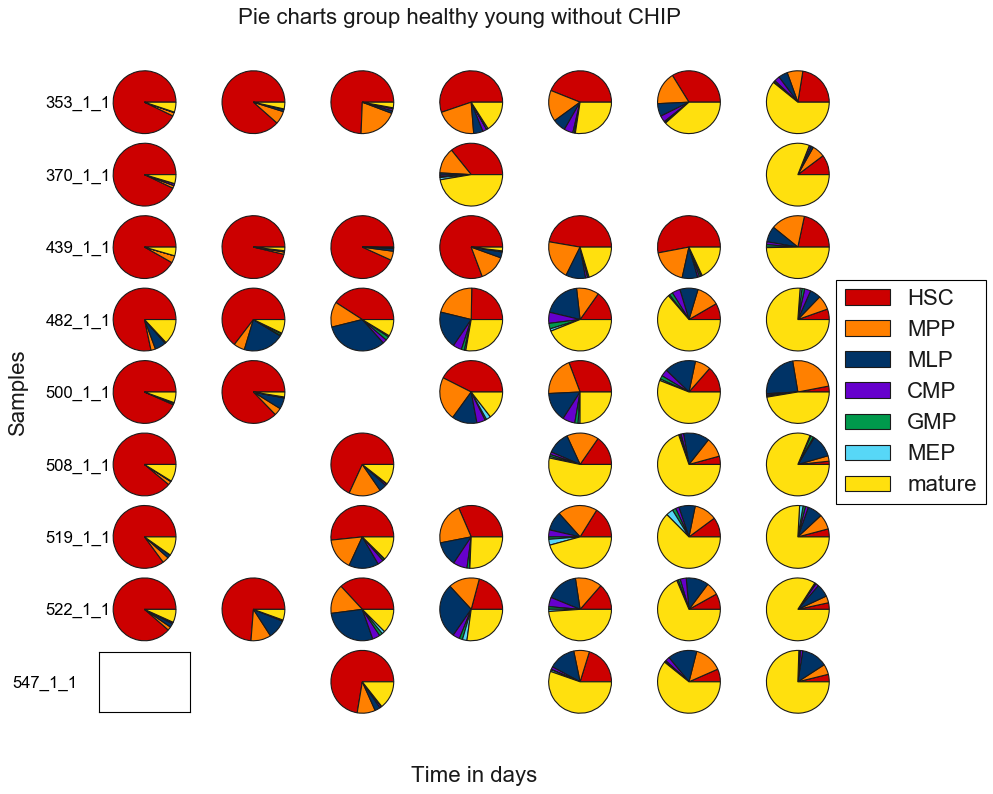

In [317]:
plot_pie_charts_of_single_samples(df,'healthy young without CHIP',CT_str[:-1],cols_CT,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


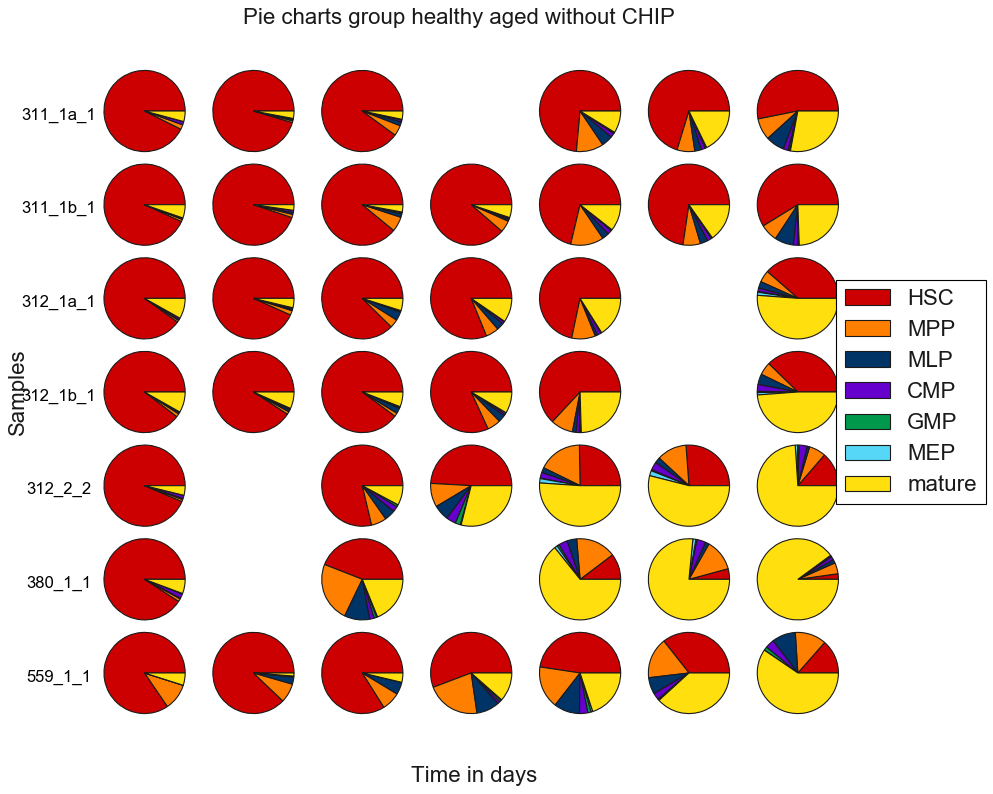

In [318]:
plot_pie_charts_of_single_samples(df,'healthy aged without CHIP',CT_str[:-1],cols_CT,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


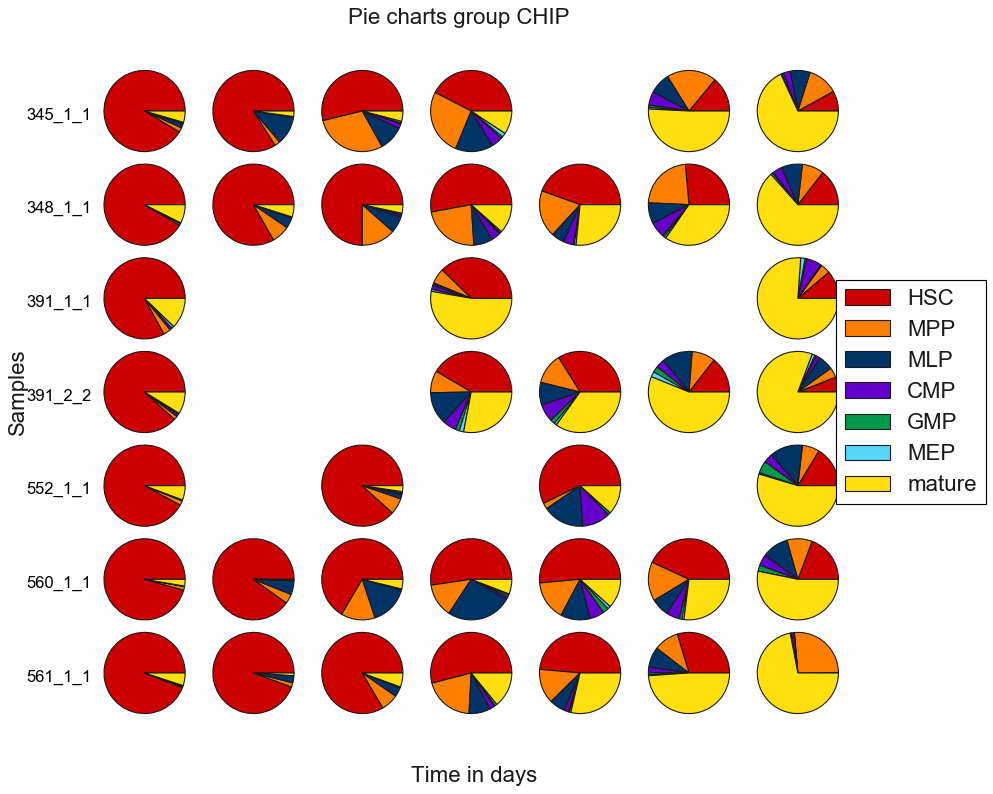

In [319]:
plot_pie_charts_of_single_samples(df,'CHIP',CT_str[:-1],cols_CT,opt_save)

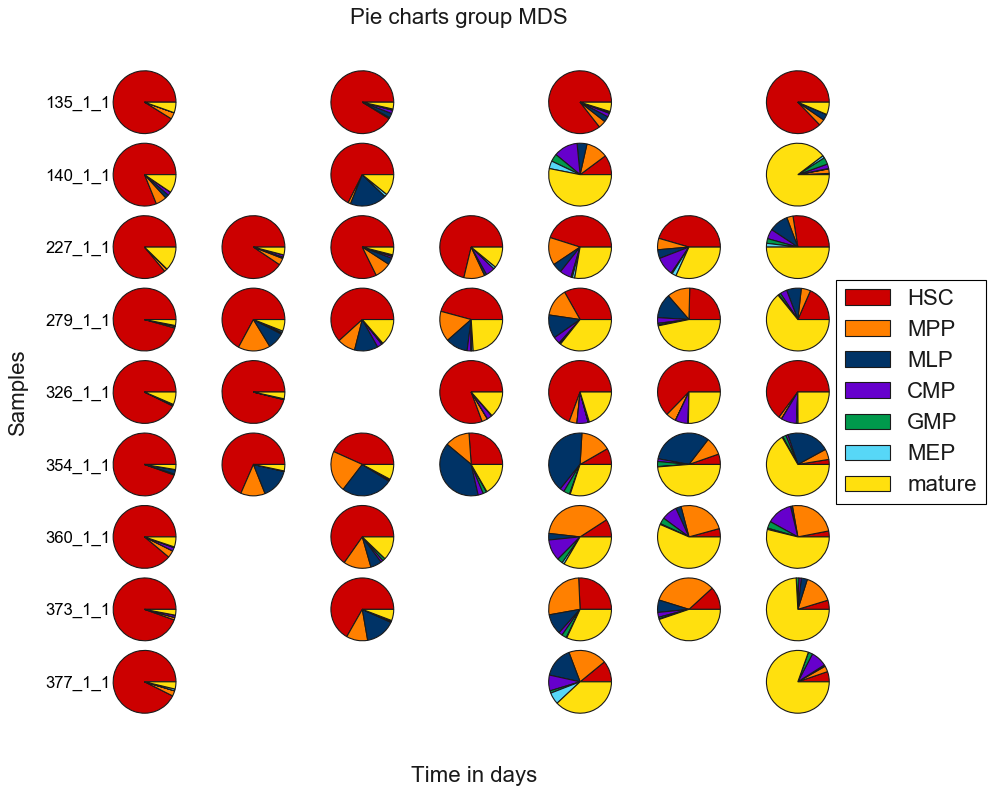

In [320]:
plot_pie_charts_of_single_samples(df,'MDS',CT_str[:-1],cols_CT,opt_save)

### Age distribution of individuals

In [47]:
loadPltSettings(20,20) #fontSize,markerSize
plot_age_distributions(df,['healthy without CHIP','CHIP'],cols_H_vs_CHIP,opt_save)

NameError: name 'cols_H_vs_CHIP' is not defined

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater


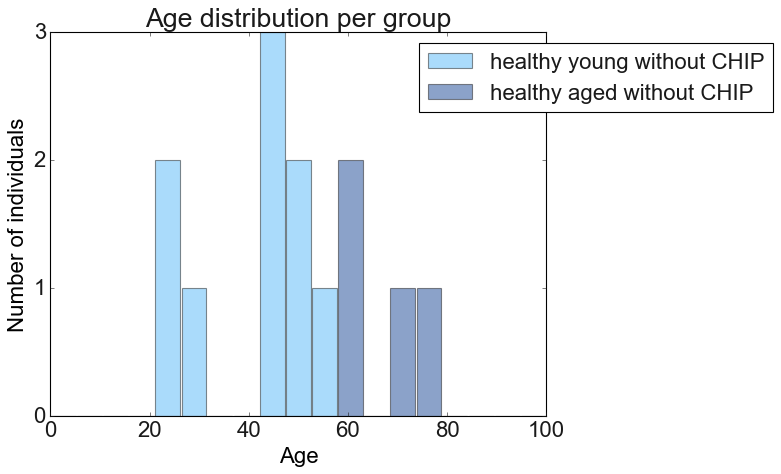

In [18]:
plot_age_distributions(df,['healthy young without CHIP','healthy aged without CHIP'],cols_H_y_vs_H_a,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  del sys.path[0]
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


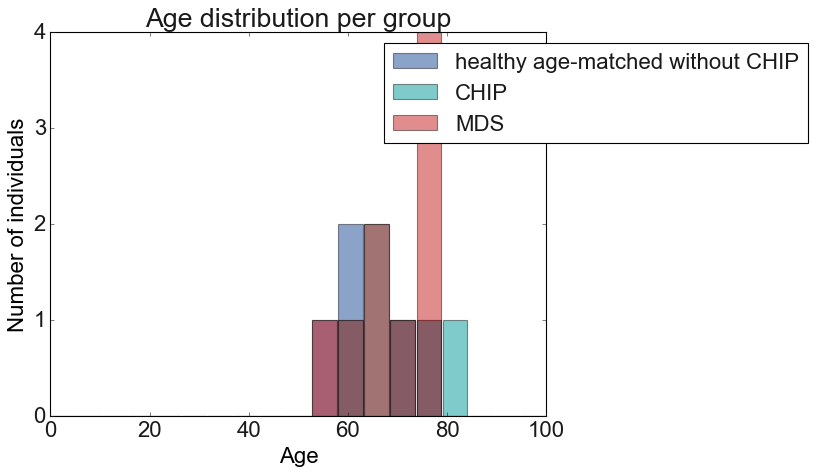

In [19]:
plot_age_distributions(df,['healthy age-matched without CHIP','CHIP','MDS'],cols_H_vs_CHIP_vs_MDS,opt_save)

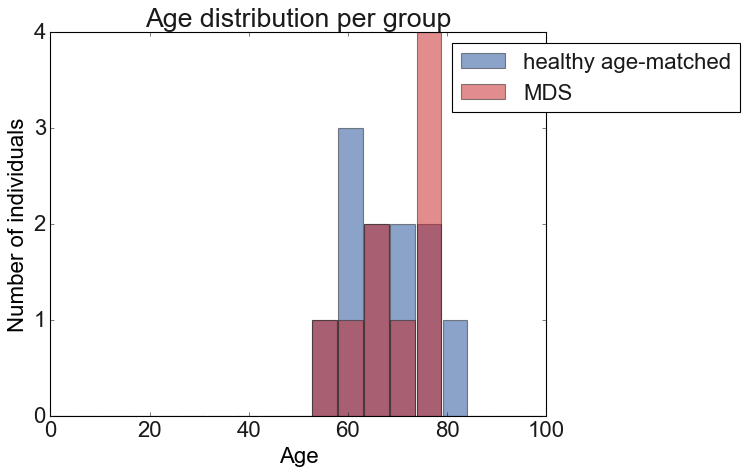

In [20]:
plot_age_distributions(df,['healthy age-matched','MDS'],cols_H_vs_MDS,opt_save)

### Plot samples
#### a) plot samples grouped by Status_detailed (with color code):

1. Specify transformation of data

In [21]:
transf = 'log10'

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


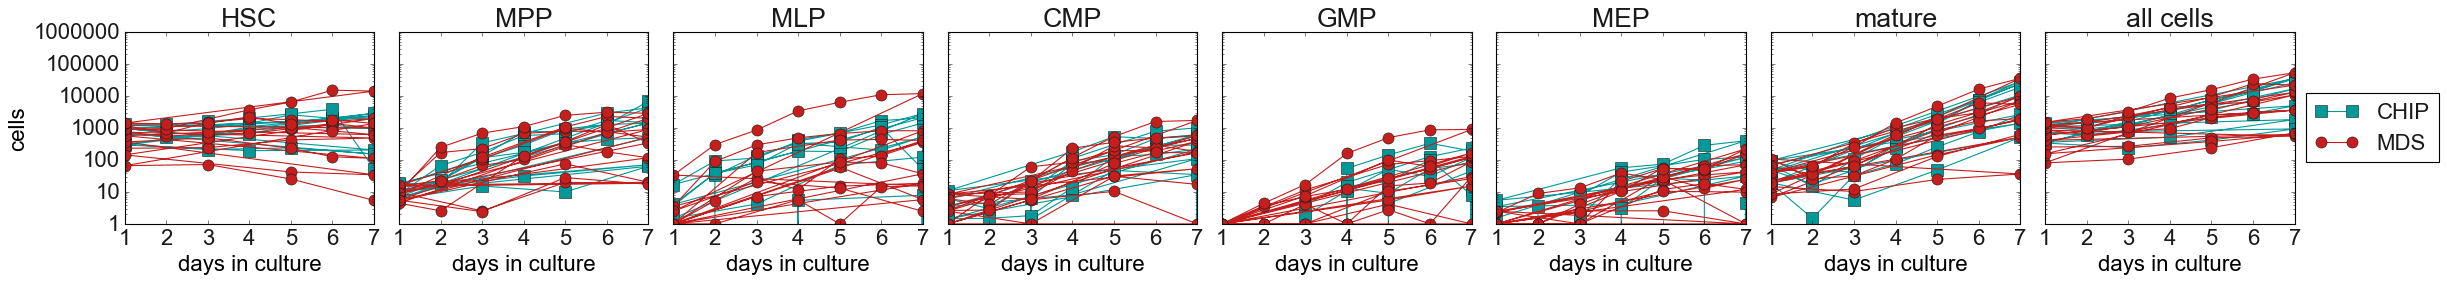

In [59]:
loadPltSettings(20,10) #fontSize,markerSize
plot_all_samples(df,CT_str,transf,['CHIP','MDS'],cols_CHIP_vs_MDS,[marker_CHIP,marker_MDS],False,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


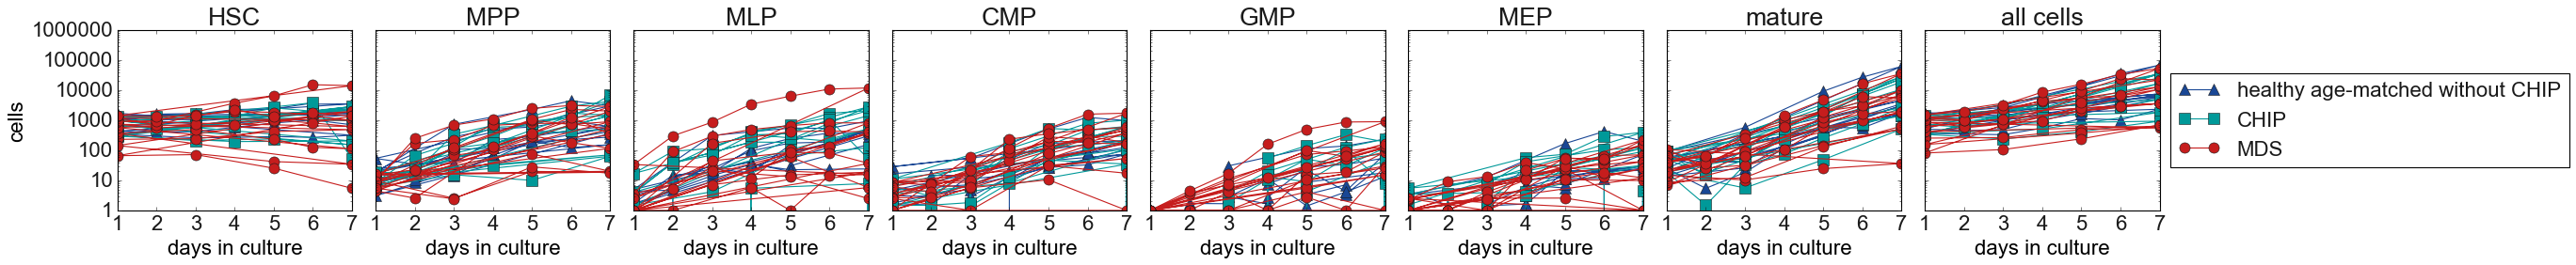

In [60]:
loadPltSettings(20,10) #fontSize,markerSize
plot_all_samples(df,CT_str,transf,['healthy age-matched without CHIP','CHIP','MDS'],cols_H_vs_CHIP_vs_MDS,[marker_H_a,marker_CHIP,marker_MDS],False,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in greater


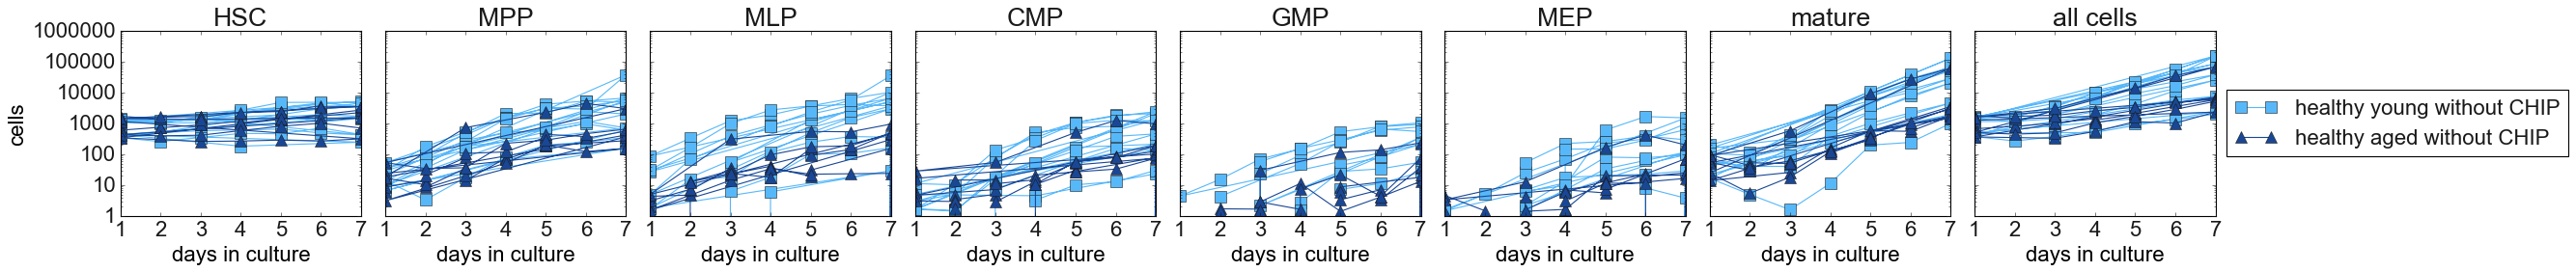

In [61]:
loadPltSettings(20,10) #fontSize,markerSize
plot_all_samples(df,CT_str,transf,['healthy young without CHIP','healthy aged without CHIP'],cols_H_y_vs_H_a,[marker_H_y,marker_H_a],False,opt_save)

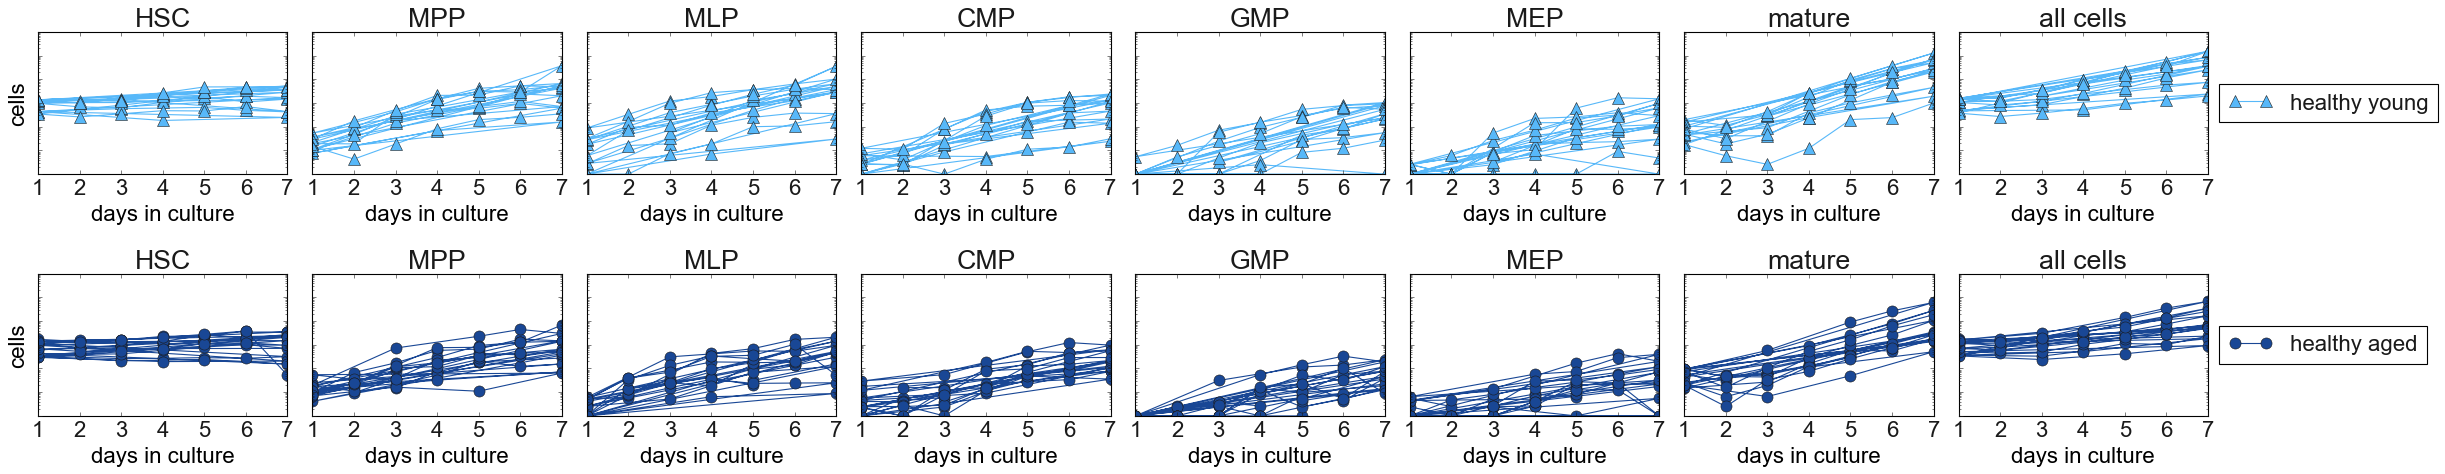

In [62]:
plot_all_samples(df,CT_str,transf,['healthy young','healthy aged'],cols_H_y_vs_H_a,[marker_H_a,marker_MDS],True,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


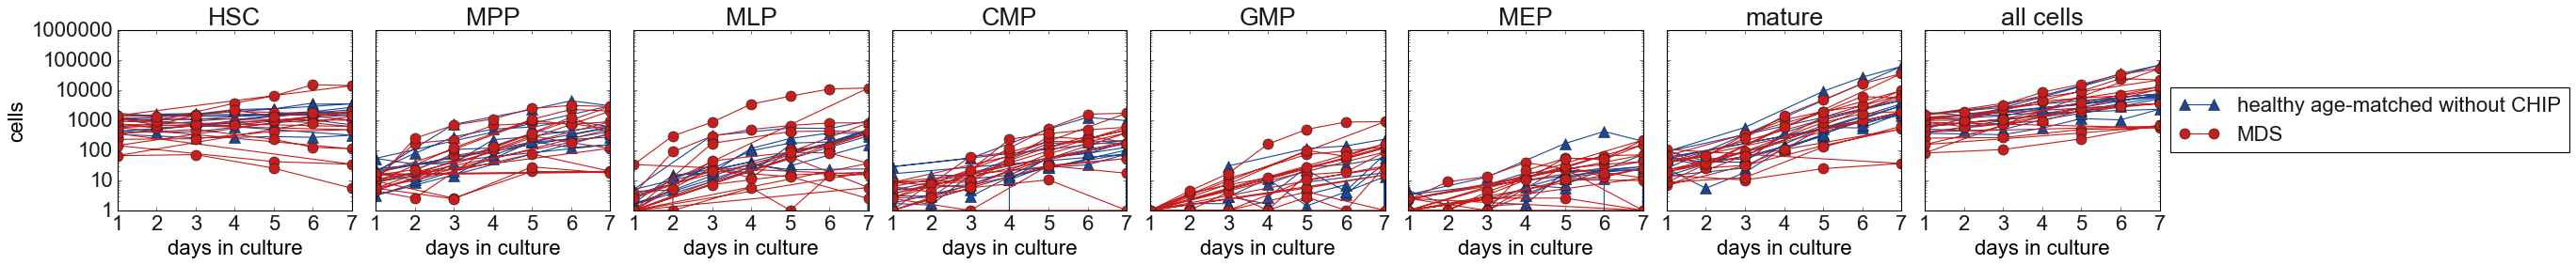

In [63]:
plot_all_samples(df,CT_str,transf,['healthy age-matched without CHIP','MDS'],cols_H_vs_MDS,[marker_H_a,marker_MDS],False,opt_save)

In [1]:
plot_all_samples(df,CT_str,transf,['healthy age-matched without CHIP','CHIP','MDS'],cols_H_vs_CHIP_vs_MDS,[marker_H_a,marker_CHIP,marker_MDS],True,opt_save)

NameError: name 'plot_all_samples' is not defined

#### b) Plot single samples

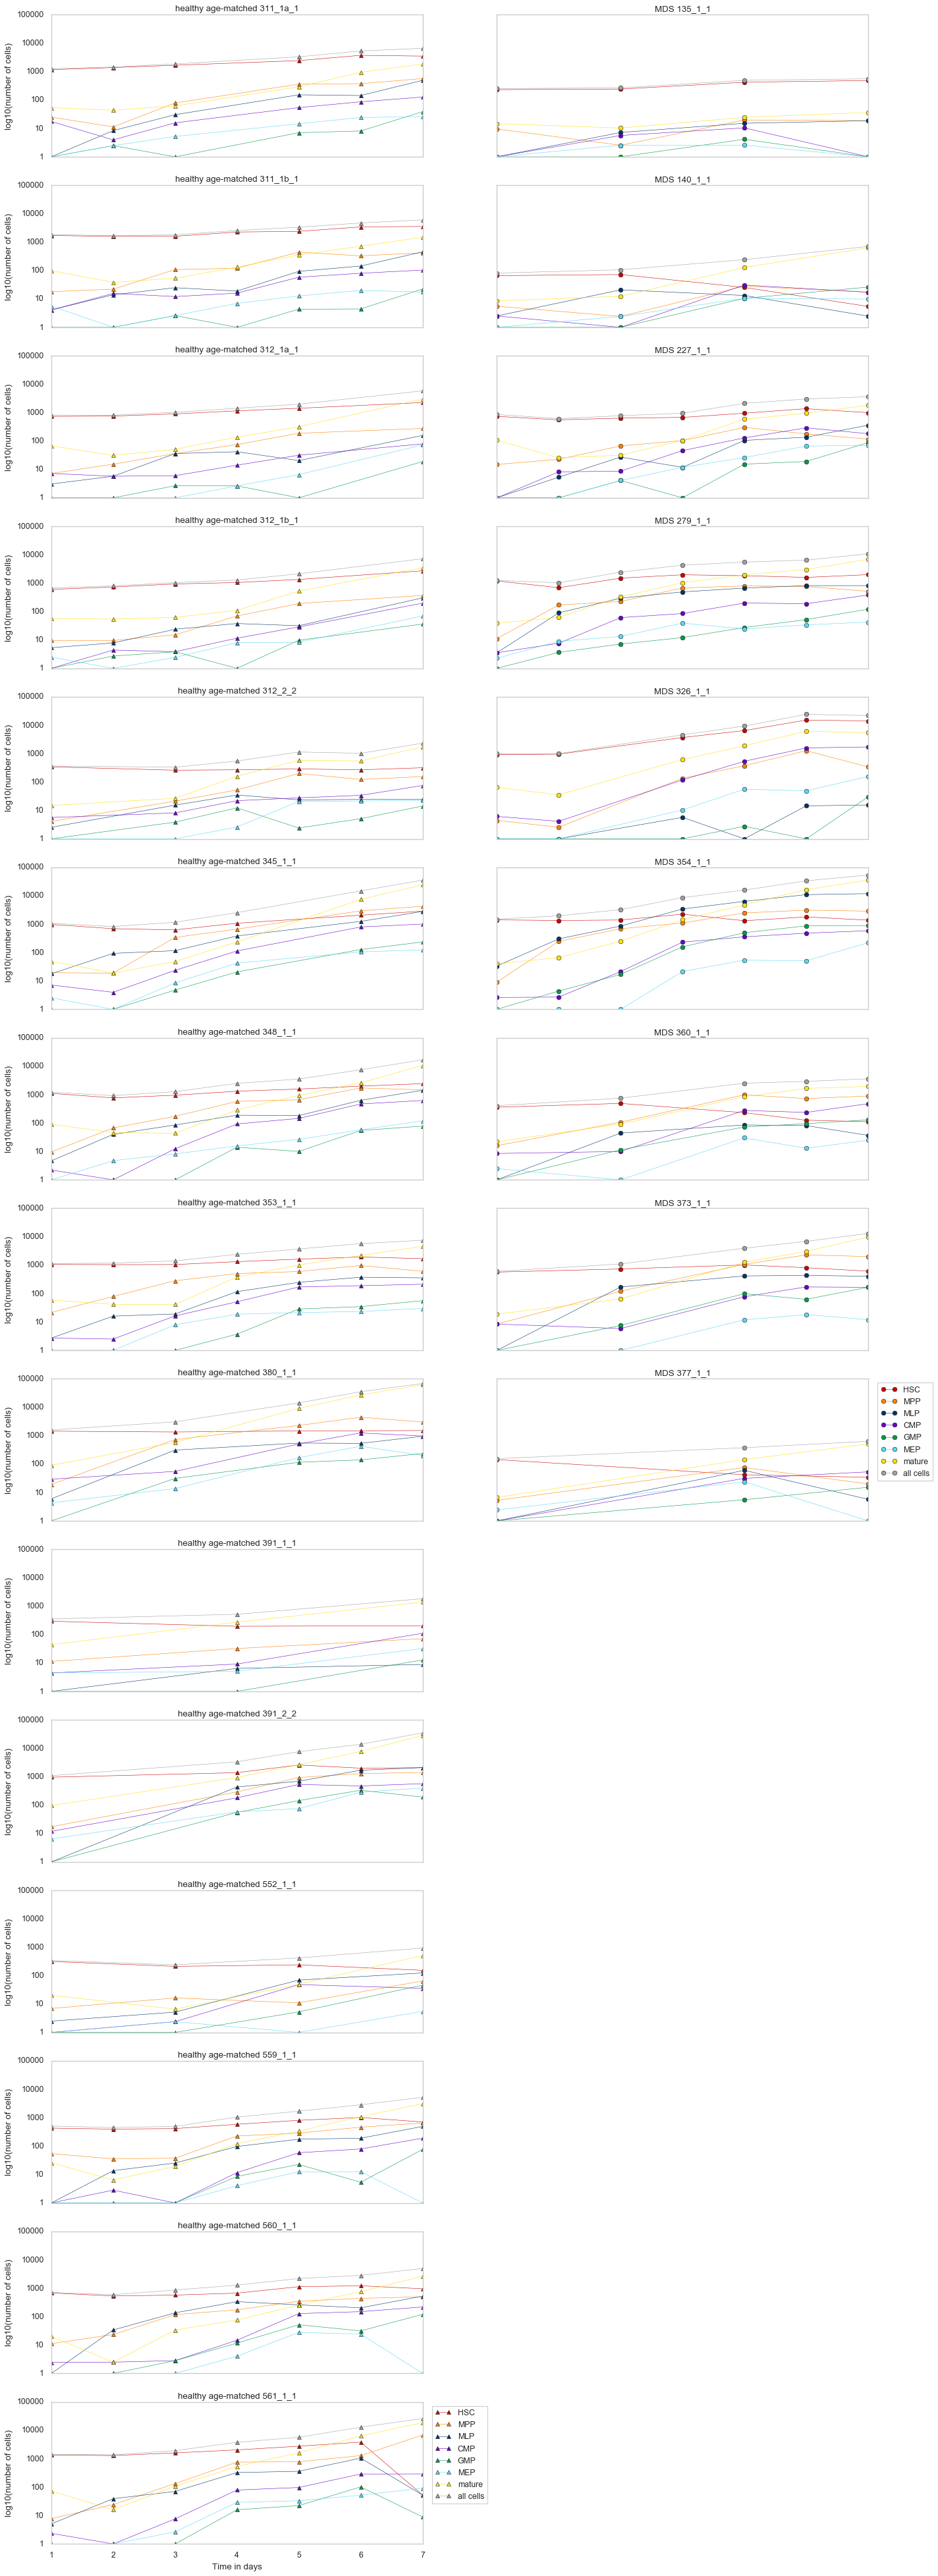

In [29]:
plot_single_samples_of2groups(df,['healthy age-matched','MDS'],transf,CT_str,cols_CT,[marker_H_a,marker_MDS],opt_save)

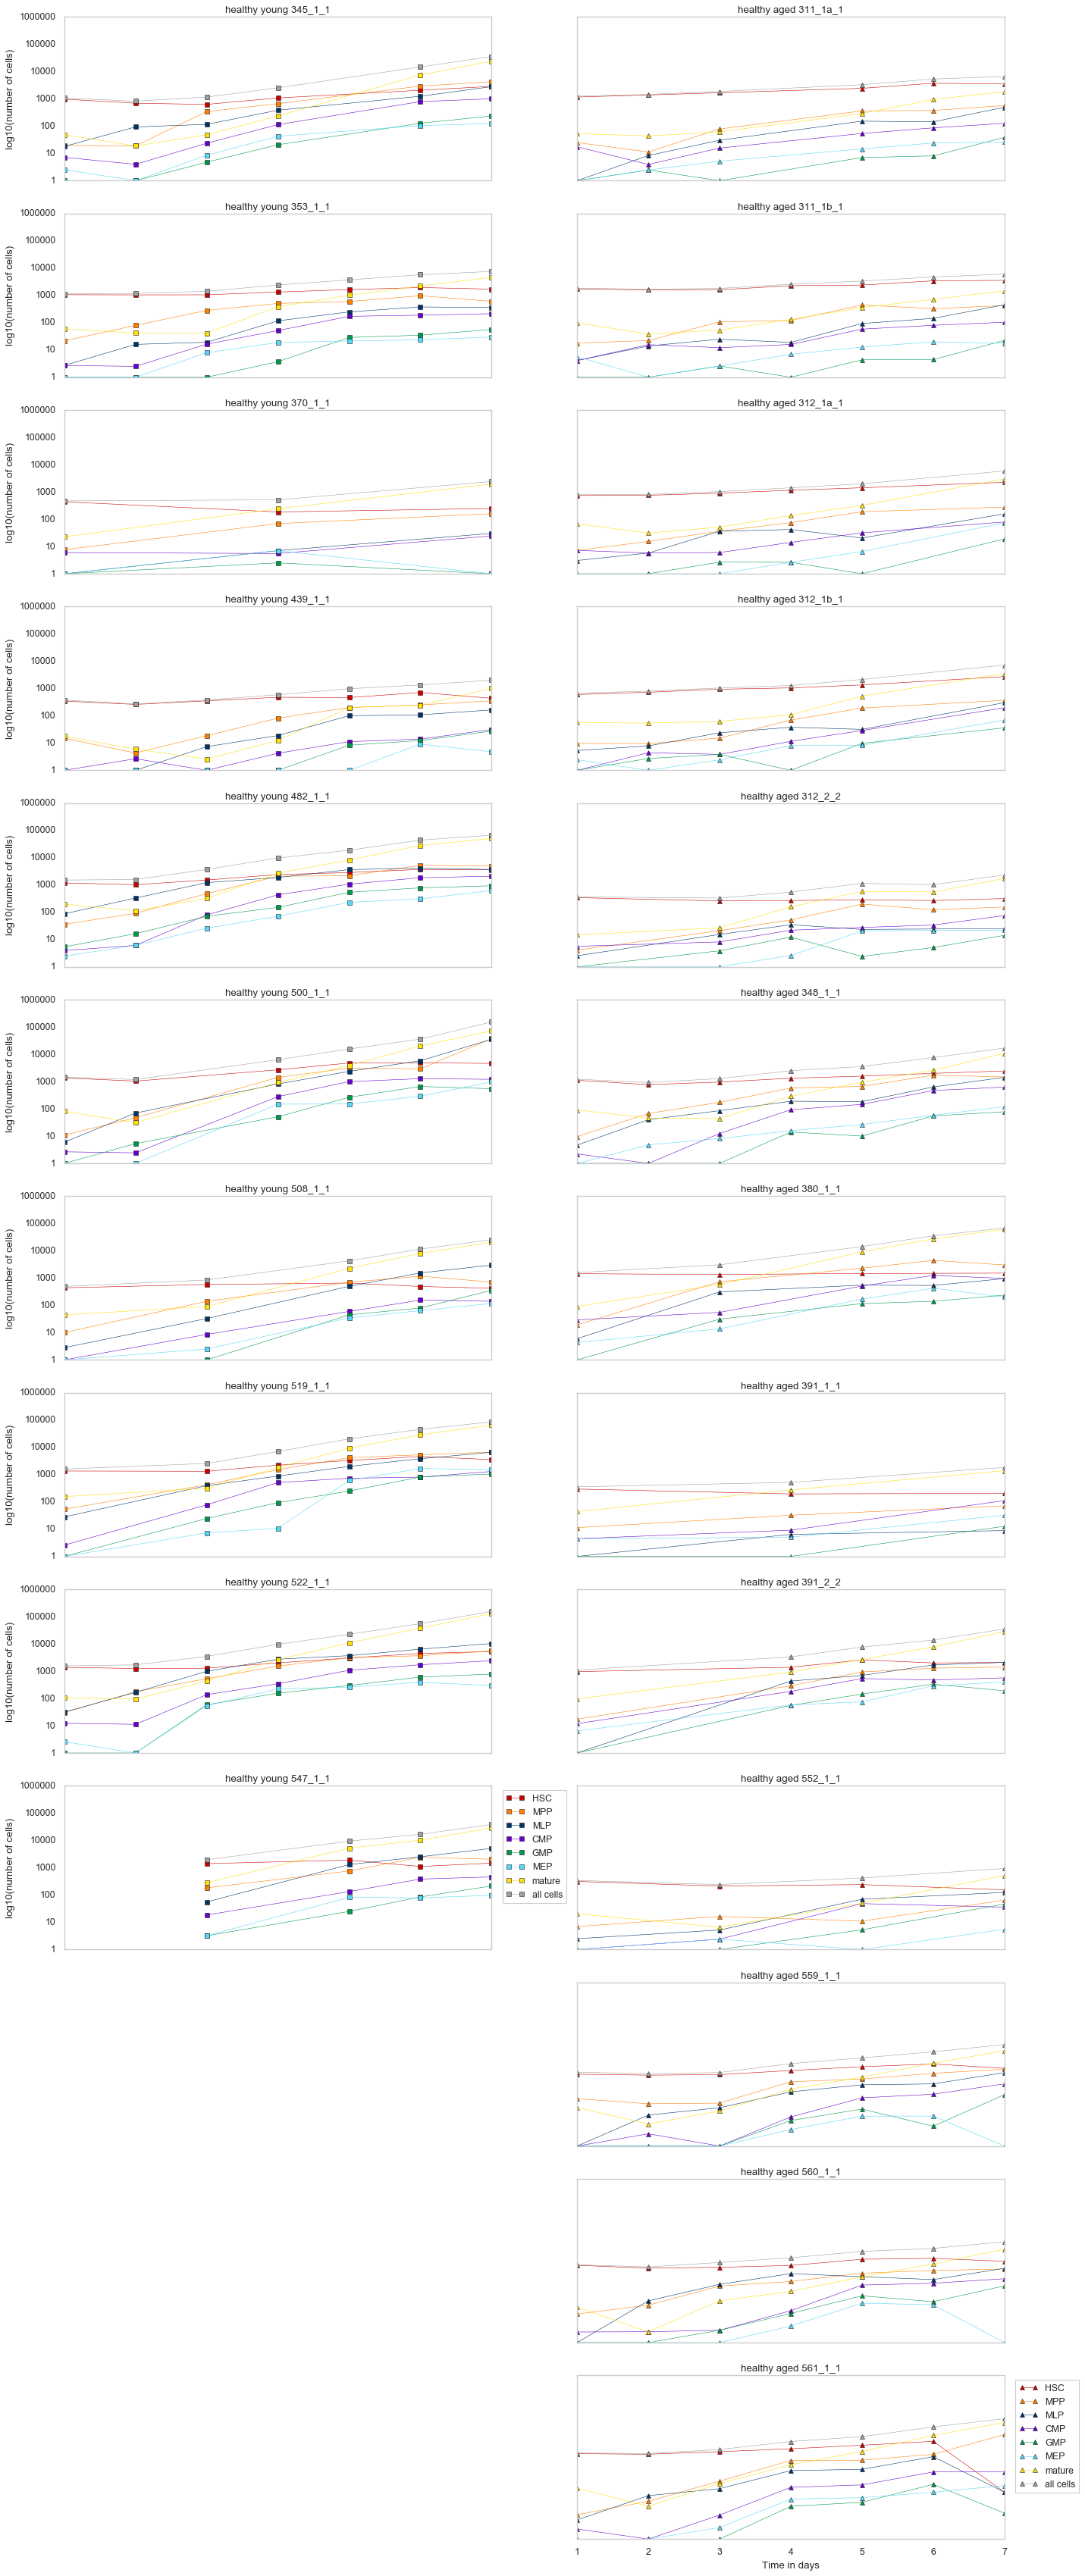

In [30]:
plot_single_samples_of2groups(df,['healthy young','healthy aged'],transf,CT_str,cols_CT,[marker_H_y,marker_H_a],opt_save)

In [31]:
#plot_single_samples_of2groups(df,['H_age_matched','MDS'],transf,['HSC'],cols_CT)

### Plot relative count of BM cells at day 7 per cell type

In [32]:
CT_str_red=['HSC','MPP','MLP','CMP','GMP','MEP']
FS=[35,25,20]
#opt_test = 'Kruskal_Wallis'
#opt_test = 'Kolmogorov_Smirnov'
opt_test = ''

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:58: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0.04405269318602738


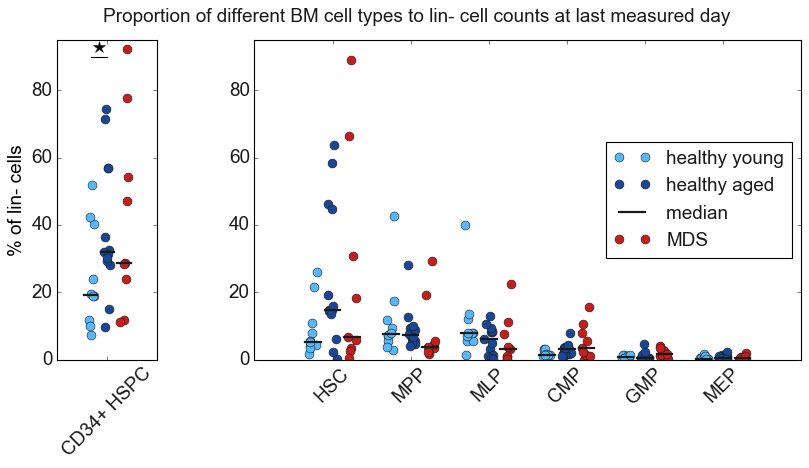

In [39]:
#normalisierung komisch --> lin neg correction
G=['healthy young', 'healthy aged', 'MDS']
add_file_str = '_H_y_vs_H_a_vs_MDS'
F = plot_fraction_Of_BM_cells_day7(df,cols_H_y_vs_H_a_vs_MDS,cols_H_y_vs_H_a_vs_MDS_light,CT_str_red,G,add_file_str,opt_test,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:58: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0.04405269318602738


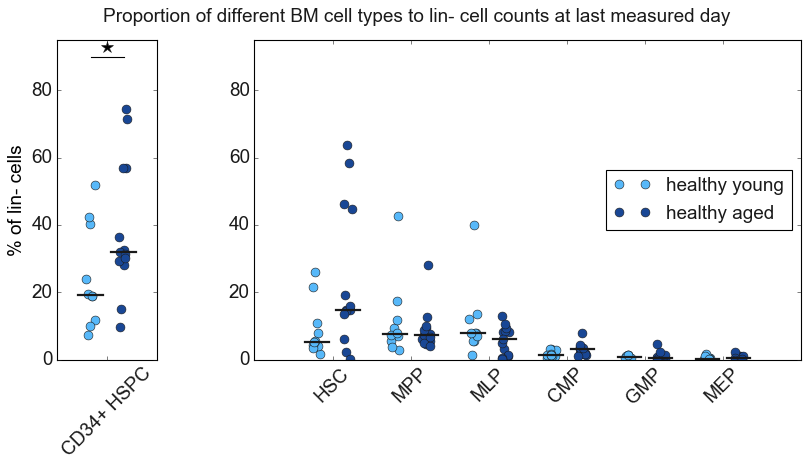

In [46]:
G=['healthy young', 'healthy aged']
add_file_str = '_H_y_vs_H_a'
F = plot_fraction_Of_BM_cells_day7(df,cols_H_y_vs_H_a,cols_H_y_vs_H_a_light,CT_str_red,G,add_file_str,opt_test,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:58: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put

0.03597211772659165


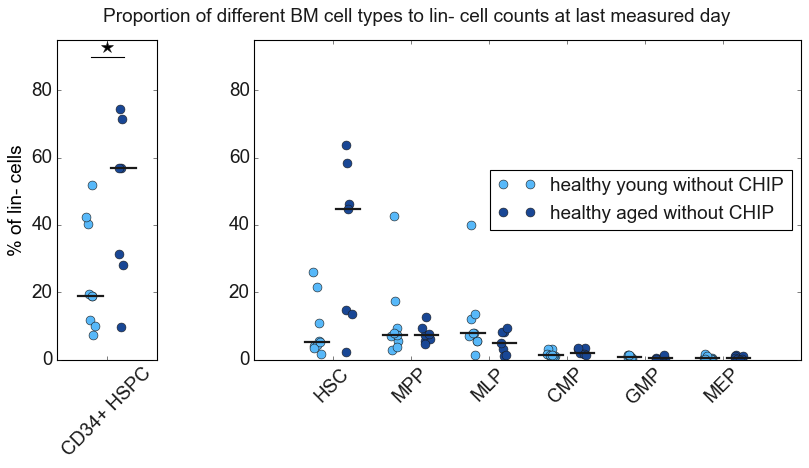

In [47]:
G=['healthy young without CHIP', 'healthy aged without CHIP']
loadPltSettings(17,2)
add_file_str = '_H_y_vs_H_a_without_CHIP'
F,p_vals = plot_fraction_Of_BM_cells_day7(df,cols_H_y_vs_H_a,cols_H_y_vs_H_a_light,CT_str_red,G,add_file_str,opt_test,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:58: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


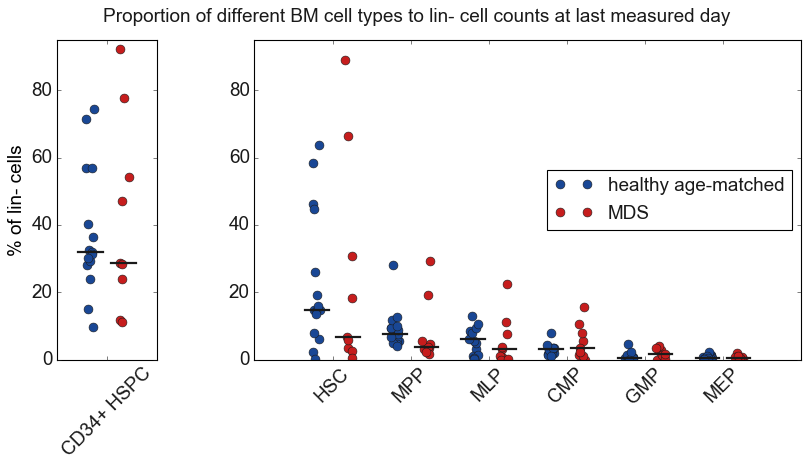

In [48]:
G=['healthy age-matched','MDS']
add_file_str = '_H_age_matched_vs_MDS'
F = plot_fraction_Of_BM_cells_day7(df,cols_H_vs_MDS,cols_H_vs_MDS_light,CT_str_red,G,add_file_str,opt_test,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:58: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


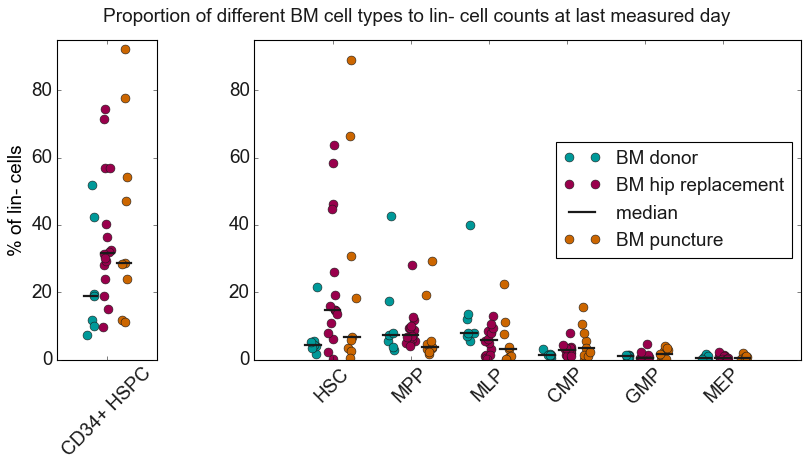

In [49]:
G=['BM donor', 'BM hip replacement', 'BM puncture']
add_file_str = '_BM_type'
F = plot_fraction_Of_BM_cells_day7(df,cols_BMtype_3,cols_BMtype_light_3,CT_str_red,G,add_file_str,opt_test,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:58: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


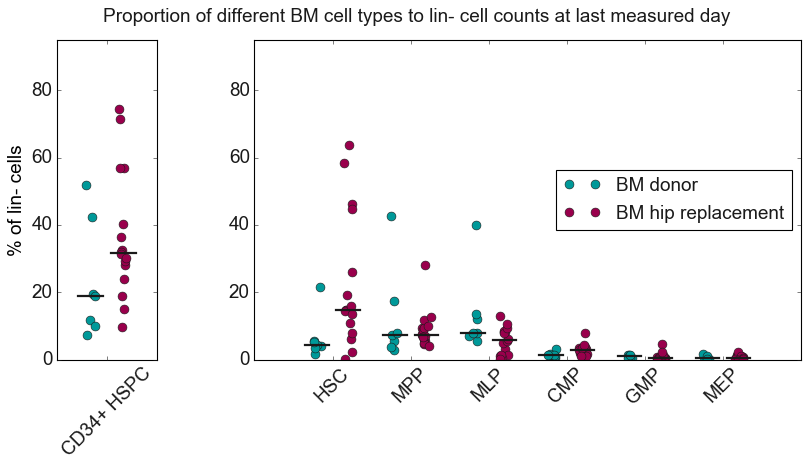

In [50]:
G=['BM donor', 'BM hip replacement']
add_file_str = '_BM_type_healthy'
F = plot_fraction_Of_BM_cells_day7(df,cols_BMtype_3,cols_BMtype_light_3,CT_str_red,G,add_file_str,opt_test,opt_save)

### Plot yield after 7 days
number of mature cells or progenitors day 7 per HSCs day 1 

In [135]:
loadPltSettings(30,10)

<module 'matplotlib.pyplot' from '/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [151]:
path = os.getcwd()
os.chdir(path)
%run 'defined_functions.ipynb'

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:66: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:63: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWar

MWU p-val:
0.218971411449987
MWU p-val:
0.055673443266570206
MWU p-val:
0.03958967478778525


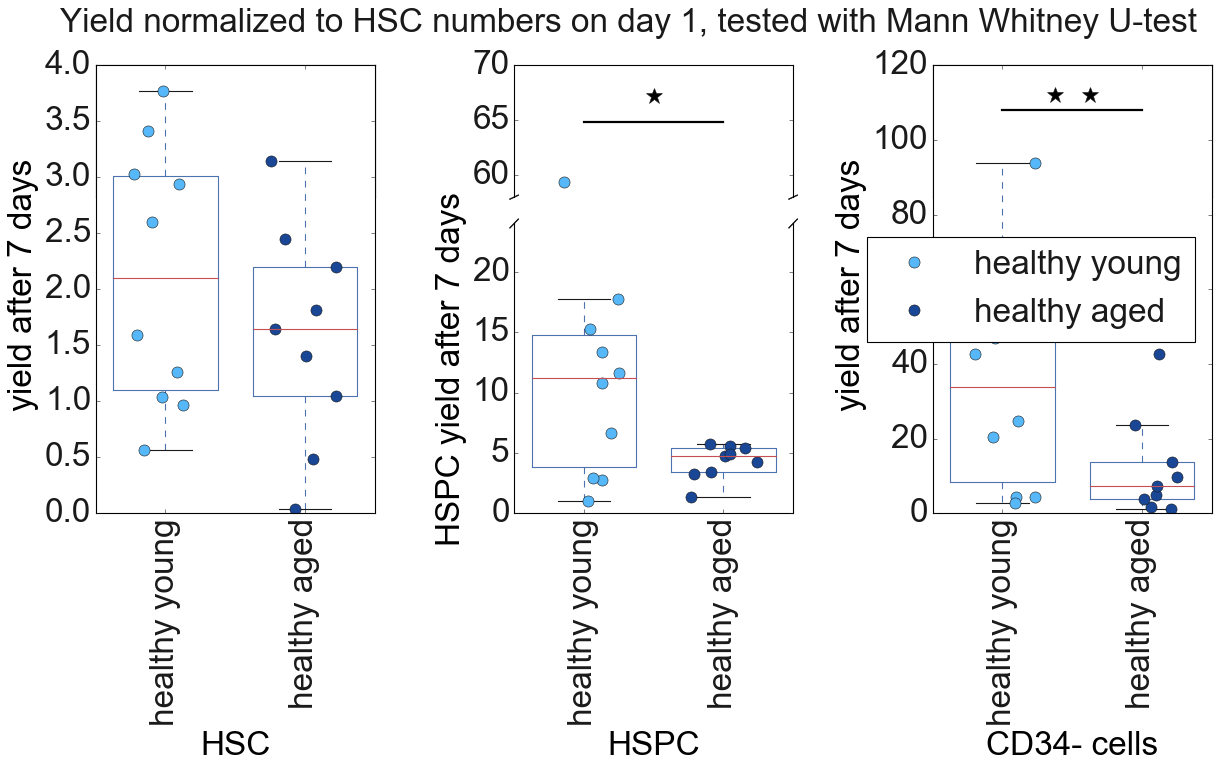

In [147]:
transf = 'lin'
G = ['healthy young','healthy aged']
add_file_str = '_H_y_vs_a'
#opt_test = 'Kruskal_Wallis'
#opt_test = 'Kolmogorov_Smirnov'
opt_test = ''
CT_interest = ['HSC','HSPC','mature']
#CT_interest = ['HSC','MPP','MLP','CMP','MEP','GMP','mature']
bool_rep_averaged = True
plot_yield_after7days(df,G,mutation_str,cols_H_y_vs_H_a_vs_MDS,CT_interest,CT_str,transf,opt_test,add_file_str,True,bool_rep_averaged,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:63: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:66: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWar

MWU p-val:
0.7529377277953682
MWU p-val:
0.3520214827933297
MWU p-val:
0.8727747086768317


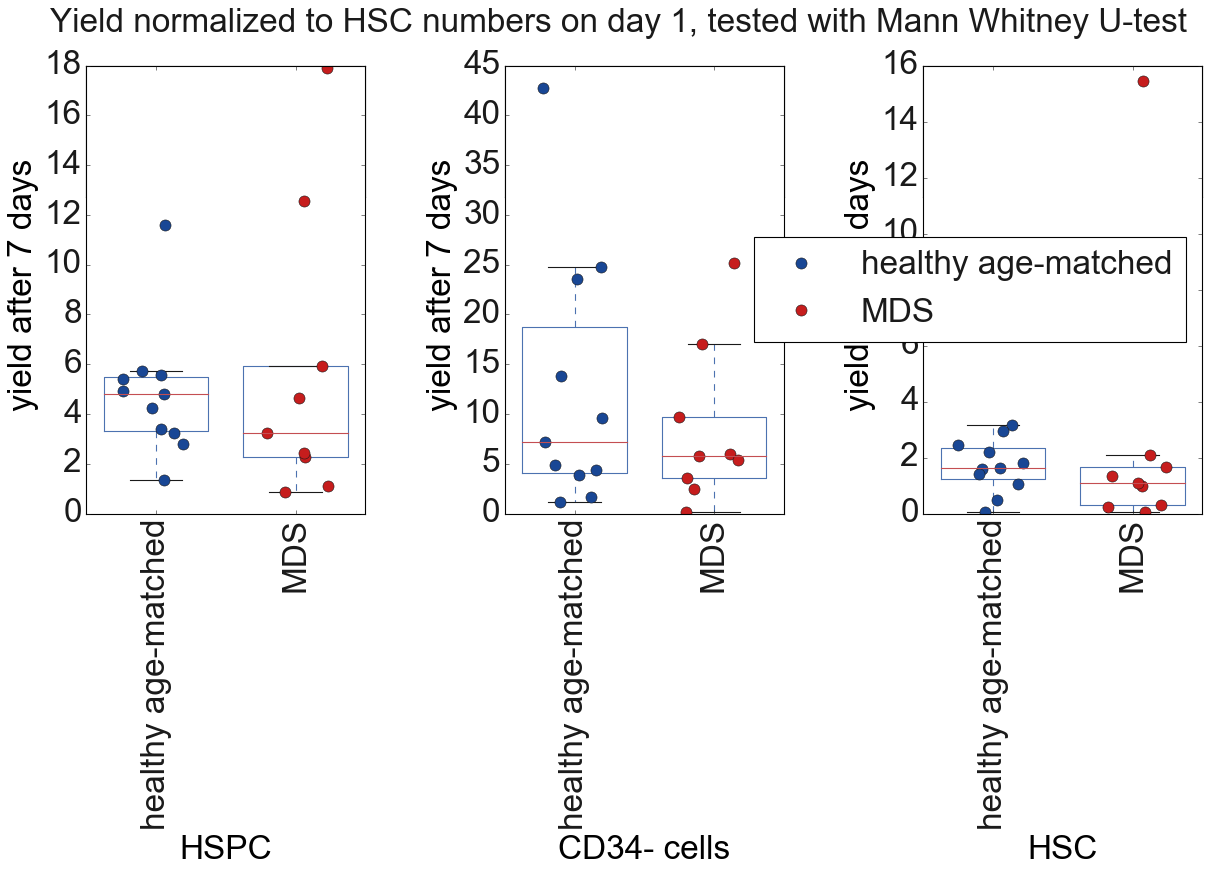

In [149]:
transf = 'lin'
G = ['healthy age-matched','MDS']
add_file_str = '_H_agematched_vs_MDS'
#opt_test = 'Kruskal_Wallis'
opt_test = 'Kolmogorov_Smirnov'
#opt_test = ''
CT_interest = ['HSPC','mature','HSC']
#CT_interest = ['HSPC','HSC','MPP','MLP','CMP','MEP','GMP','mature']
bool_rep_averaged = True
plot_yield_after7days(df,G,mutation_str,cols_H_vs_MDS,CT_interest,CT_str,transf,opt_test,add_file_str,False,bool_rep_averaged,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in greater
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:63: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: The 'get_values' method is deprecated and will be removed in a future 

['380']


/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:63: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:170: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous 

[]


/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:63: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:170: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: The 'get_values' metho

[]
MWU p-val:
0.11766663325479293
MWU p-val:
0.7415661252245681
MWU p-val:
0.32403843406957306
MWU p-val:
0.2584338747754319
MWU p-val:
0.2614083269595443
MWU p-val:
0.7415661252245681


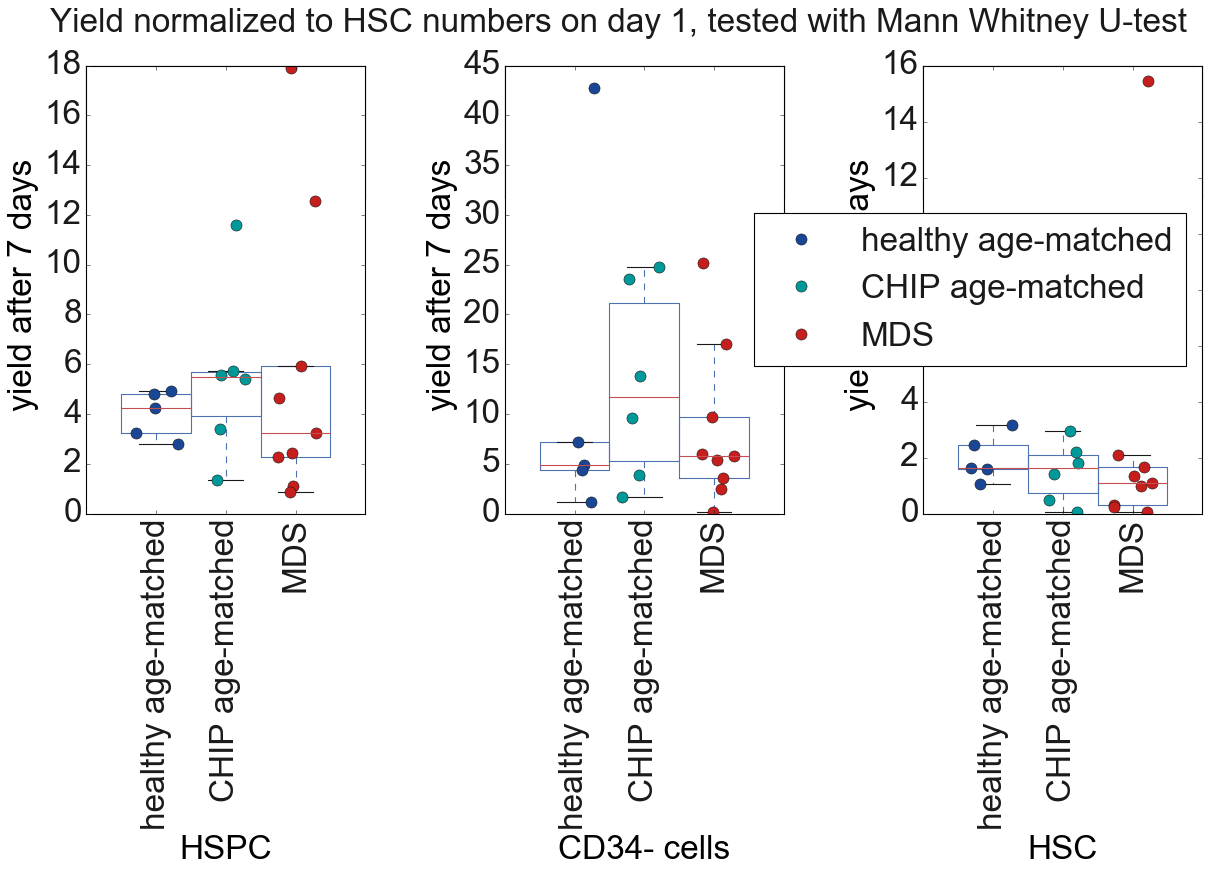

In [152]:
transf = 'lin'
G = ['healthy age-matched','CHIP age-matched','MDS']
add_file_str = '_H_agematched_vs_CHIP_agematched_vs_MDS'
#opt_test = 'Kruskal_Wallis'
#opt_test = 'Kolmogorov_Smirnov'
opt_test = ''
CT_interest = ['HSPC','mature','HSC']
#CT_interest = ['HSPC','HSC','MPP','MLP','CMP','MEP','GMP','mature']
bool_rep_averaged = True
plot_yield_after7days(df,G,mutation_str,cols_H_vs_CHIP_vs_MDS,CT_interest,CT_str,transf,opt_test,add_file_str,False,bool_rep_averaged,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:55: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWar

median healthy young:
2.1000347826379073
median healthy young:
11.197673232312138
median healthy young:
33.73565136170993


/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:147: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: The 'get_values' method is

median healthy aged:
1.6422875019994574
median healthy aged:
4.079274908417971
median healthy aged:
5.033248841393077


/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:147: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: The 'get_values' method is

median MDS:
1.080483891380861
median MDS:
3.234766044429276


/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:147: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:147: MatplotlibDeprecationWarning: Adding an 

median MDS:
5.78628856839392
HSC Mann-Whitney-U test, p-value:
0.25746438909732106
HSC Mann-Whitney-U test, p-value:
0.8250782230655689
HSPC Mann-Whitney-U test, p-value:
0.021922770830088183
HSPC Mann-Whitney-U test, p-value:
0.6307688232507087
mature Mann-Whitney-U test, p-value:
0.018873946756576564
mature Mann-Whitney-U test, p-value:
0.5531232048978039


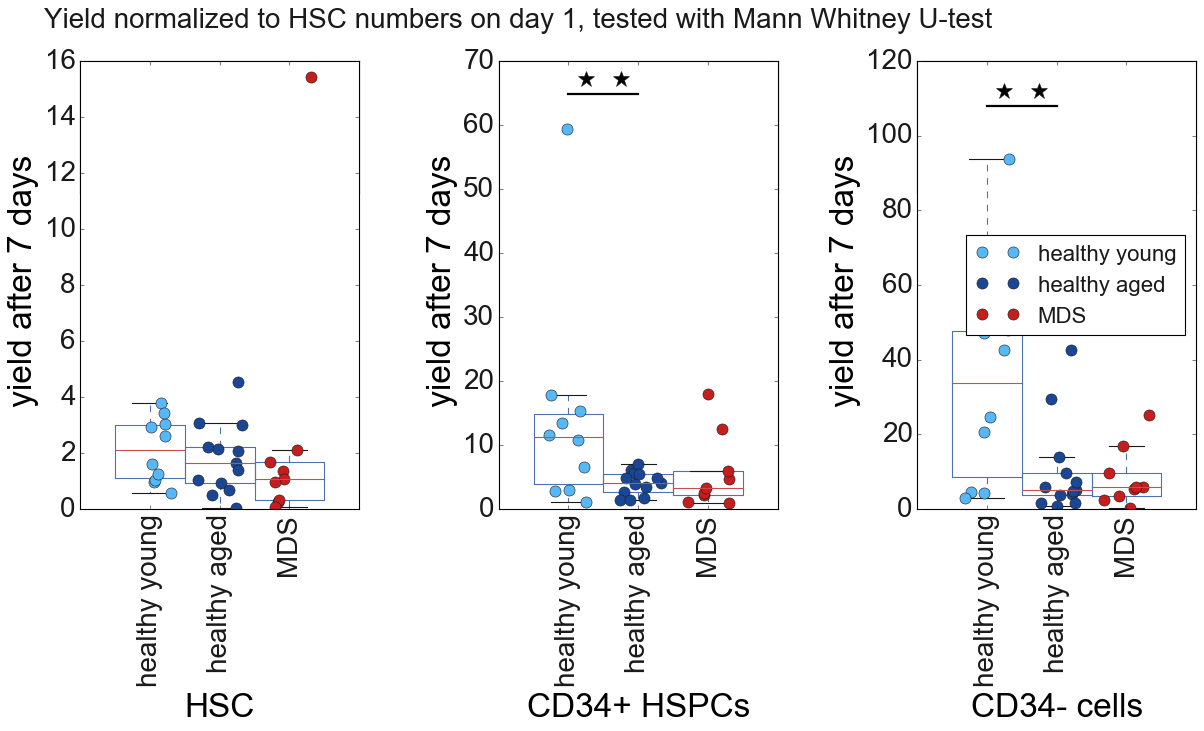

In [113]:
transf = 'lin'
G = ['healthy young','healthy aged','MDS']
add_file_str = 'H_y_vs_a_vs_MDS'
#opt_test = 'Kruskal_Wallis'
#opt_test = 'Kolmogorov_Smirnov'
opt_test = ''
CT_interest = ['HSC','HSPC','mature']
#CT_interest = ['HSPC','HSC','MPP','MLP','CMP','MEP','GMP','mature']
plot_yield_after7days(df,G,mutation_str,cols_H_y_vs_H_a_vs_MDS,CT_interest,CT_str,transf,opt_test,add_file_str,False,opt_save)

#### Yield vs age

In [56]:
transf = 'lin'
G = ['healthy young','healthy aged']
add_file_str = '_H_y_vs_a'
CT_interest = ['HSC','HSPC','mature']
#CT_interest = ['HSC','MPP','MLP','CMP','MEP','GMP','mature']
loadPltSettings(18,10)

<module 'matplotlib.pyplot' from '/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.


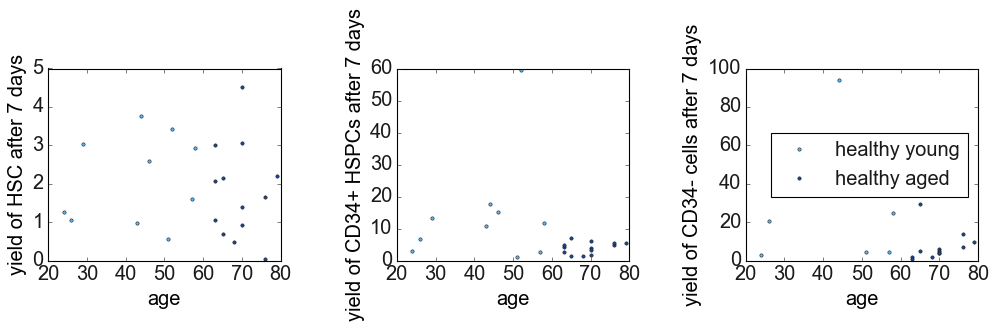

In [57]:
plot_yield_after7days_vs_age(df,G,mutation_str,cols_H_y_vs_H_a,CT_interest,CT_str,transf,opt_save)

#### Fraction of HSCs vs age

In [129]:
loadPltSettings(18,10)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.


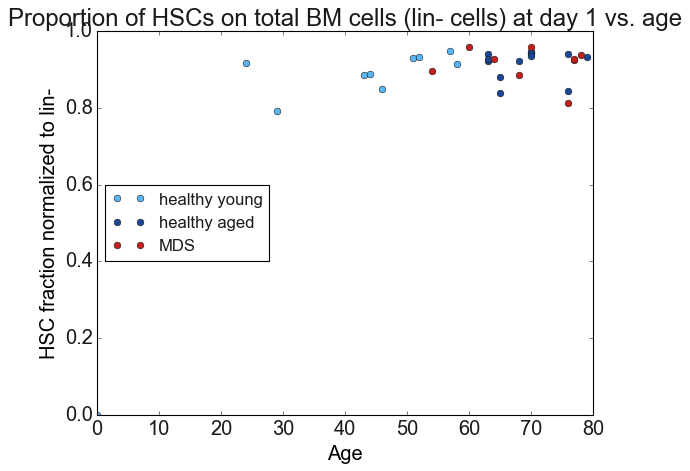

In [131]:
day=1
G=['healthy young', 'healthy aged', 'MDS']
add_file_str = '_H_y_a_MDS'
plot_fraction_Of_HSCs_at_specific_day_vs_age(df,cols_H_y_vs_H_a_vs_MDS,G,day,add_file_str,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.


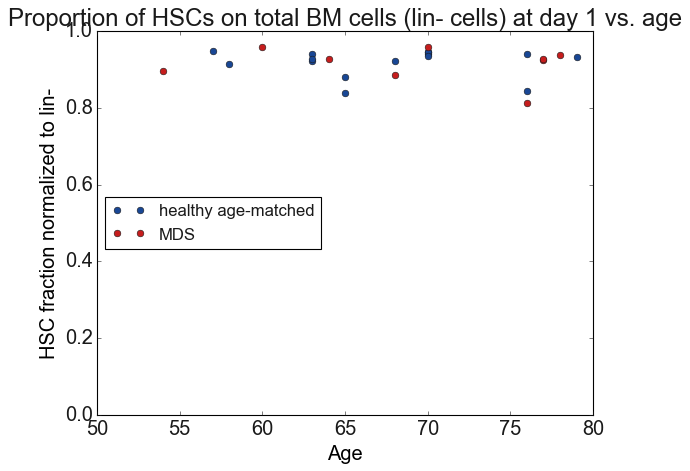

In [132]:
G=['healthy age-matched','MDS']
add_file_str = '_H_MDS'
plot_fraction_Of_HSCs_at_specific_day_vs_age(df,cols_H_vs_MDS,G,day,add_file_str,opt_save)

/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/lisa.bast/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.


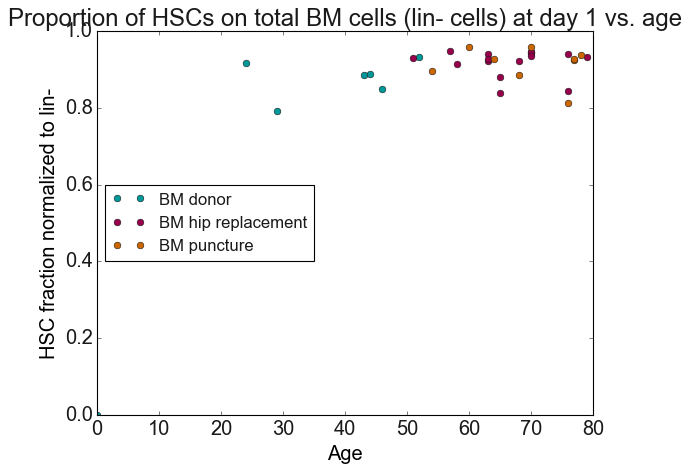

In [133]:
G=['BM donor', 'BM hip replacement', 'BM puncture']
add_file_str = '_BM_type'
plot_fraction_Of_HSCs_at_specific_day_vs_age(df,cols_BMtype_3,G,day,add_file_str,opt_save)

### Number/ fraction of HSCs per Sample in bar plot (stacked for number of divisions)
(takes a couple of minutes to run)

In [ ]:
loadPltSettings(25,20) #fontSize,markerSize
for CT in CT_str:
    plot_number_of_divisions_vs_time_for_CT(CT,df,df_divs_all,['healthy age-matched','MDS'],cols_divisions,'absoluteNumbers',opt_save)
    plot_number_of_divisions_vs_time_for_CT(CT,df,df_divs_all,['healthy age-matched','MDS'],cols_divisions,'percentages',opt_save)
    plot_number_of_divisions_vs_time_for_CT(CT,df,df_divs_all,['healthy young','healthy aged'],cols_divisions,'absoluteNumbers',opt_save)
    plot_number_of_divisions_vs_time_for_CT(CT,df,df_divs_all,['healthy young','healthy aged'],cols_divisions,'percentages',opt_save)

### Percentage of HSCs that have not divided vs. time (a dot for each sample, color coded for Status_detailed)

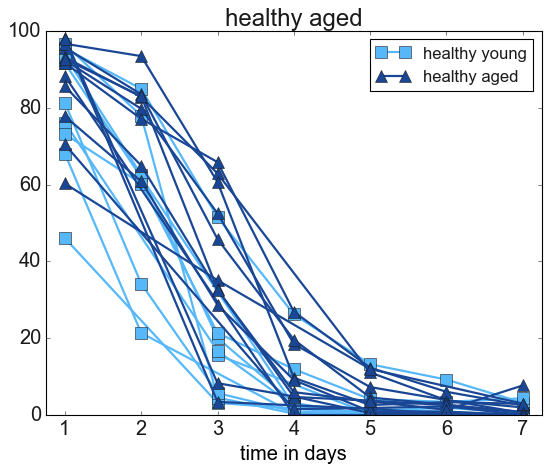

In [138]:
plot_percentage_nondivided_HSCs(df,df_divs_all,['healthy young','healthy aged'],cols_H_y_vs_H_a,[marker_H_y,marker_H_a],False,opt_save)

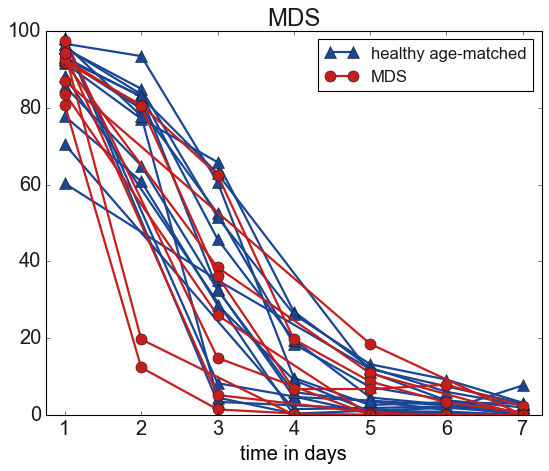

In [140]:
plot_percentage_nondivided_HSCs(df,df_divs_all,['healthy age-matched','MDS'],cols_H_vs_MDS,[marker_H_a,marker_MDS],False,opt_save)

### Percentage of HSCs completed 1st division (comparison to Shepherd et al. 2018)

#### Comparison of young healthy (Age<60, light blue) and aged healthy (Age>=60, dark blue)

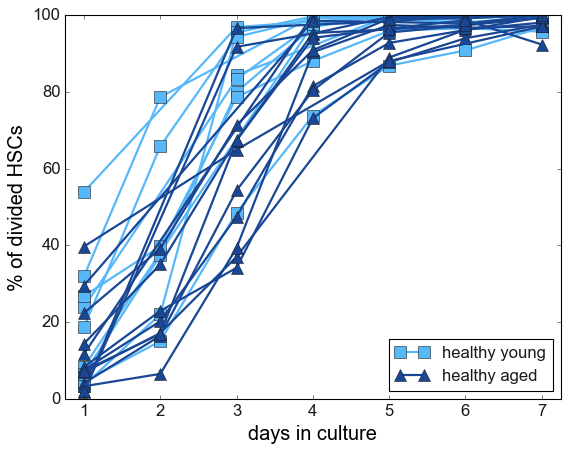

In [141]:
add_file_str='H_young_vs_H_aged'
plot_percentage_of_HSCs_which_completed_nth_division(df,df_divs_all,['healthy young','healthy aged'],cols_H_y_vs_H_a,[marker_H_y,marker_H_a],1,False,add_file_str,opt_save)

#### Comparison of age matched healthy & MDS 

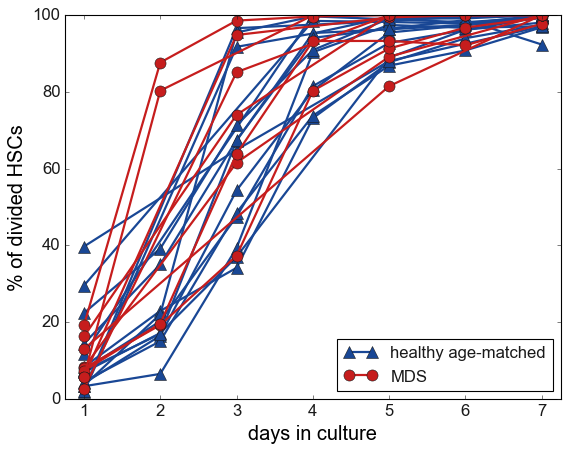

In [142]:
add_file_str='H_agematched_vs_MDS'
plot_percentage_of_HSCs_which_completed_nth_division(df,df_divs_all,['healthy age-matched','MDS'],cols_H_vs_MDS,[marker_H_a,marker_MDS],1,False,add_file_str,opt_save)

### Percentage of HSCs completed 2nd division (comparison to Shepherd et al. 2018)

#### Comparison of young healthy (Age<60, light blue), aged healthy (Age>=60, dark blue) and MDS (red) 

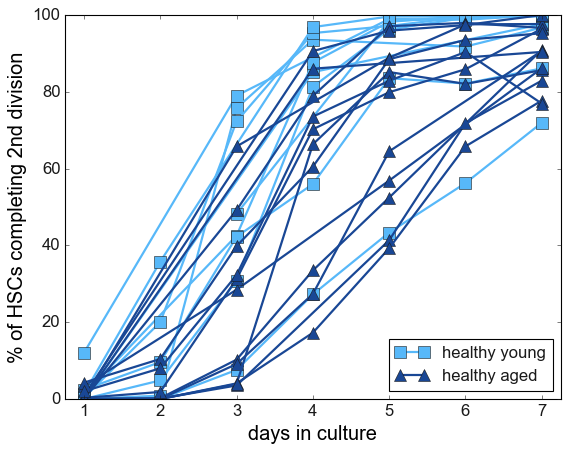

In [148]:
add_file_str='H_young_vs_H_aged'
plot_percentage_of_HSCs_which_completed_nth_division(df,df_divs_all,['healthy young','healthy aged'],cols_H_y_vs_H_a,[marker_H_y,marker_H_a],2,False,add_file_str,opt_save)

#### Comparison of age matched healthy & MDS 

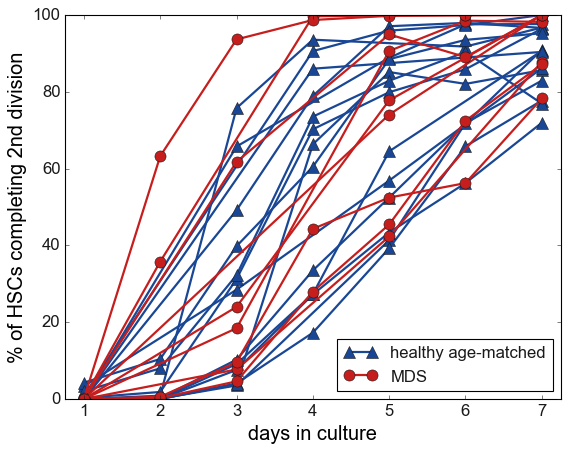

In [147]:
add_file_str='H_agematched_vs_MDS'
plot_percentage_of_HSCs_which_completed_nth_division(df,df_divs_all,['healthy age-matched','MDS'],cols_H_vs_MDS,[marker_H_a,marker_MDS],2,False,add_file_str,opt_save)

### Violinplot grouped by Status for each day and cell type:

In [160]:
loadPltSettings(10,10)

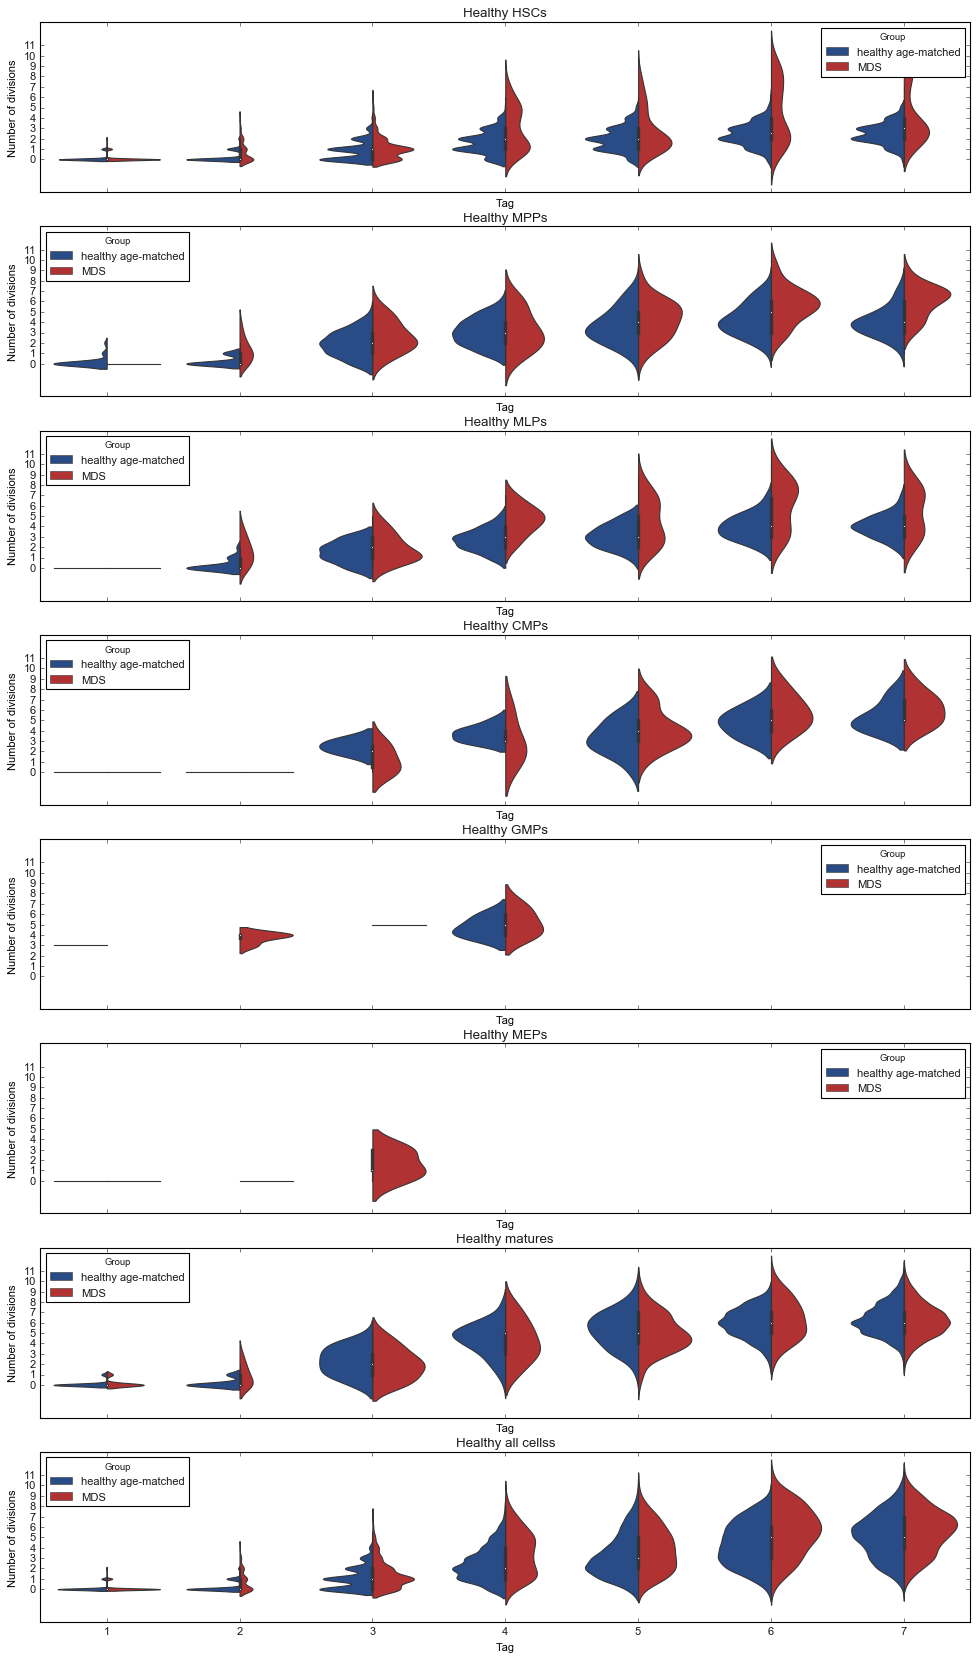

In [161]:
plotDivisionDistributionsAsViolins(df_divs_F_all,CT_str,['healthy age-matched','MDS'],cols_H_vs_MDS,opt_save)

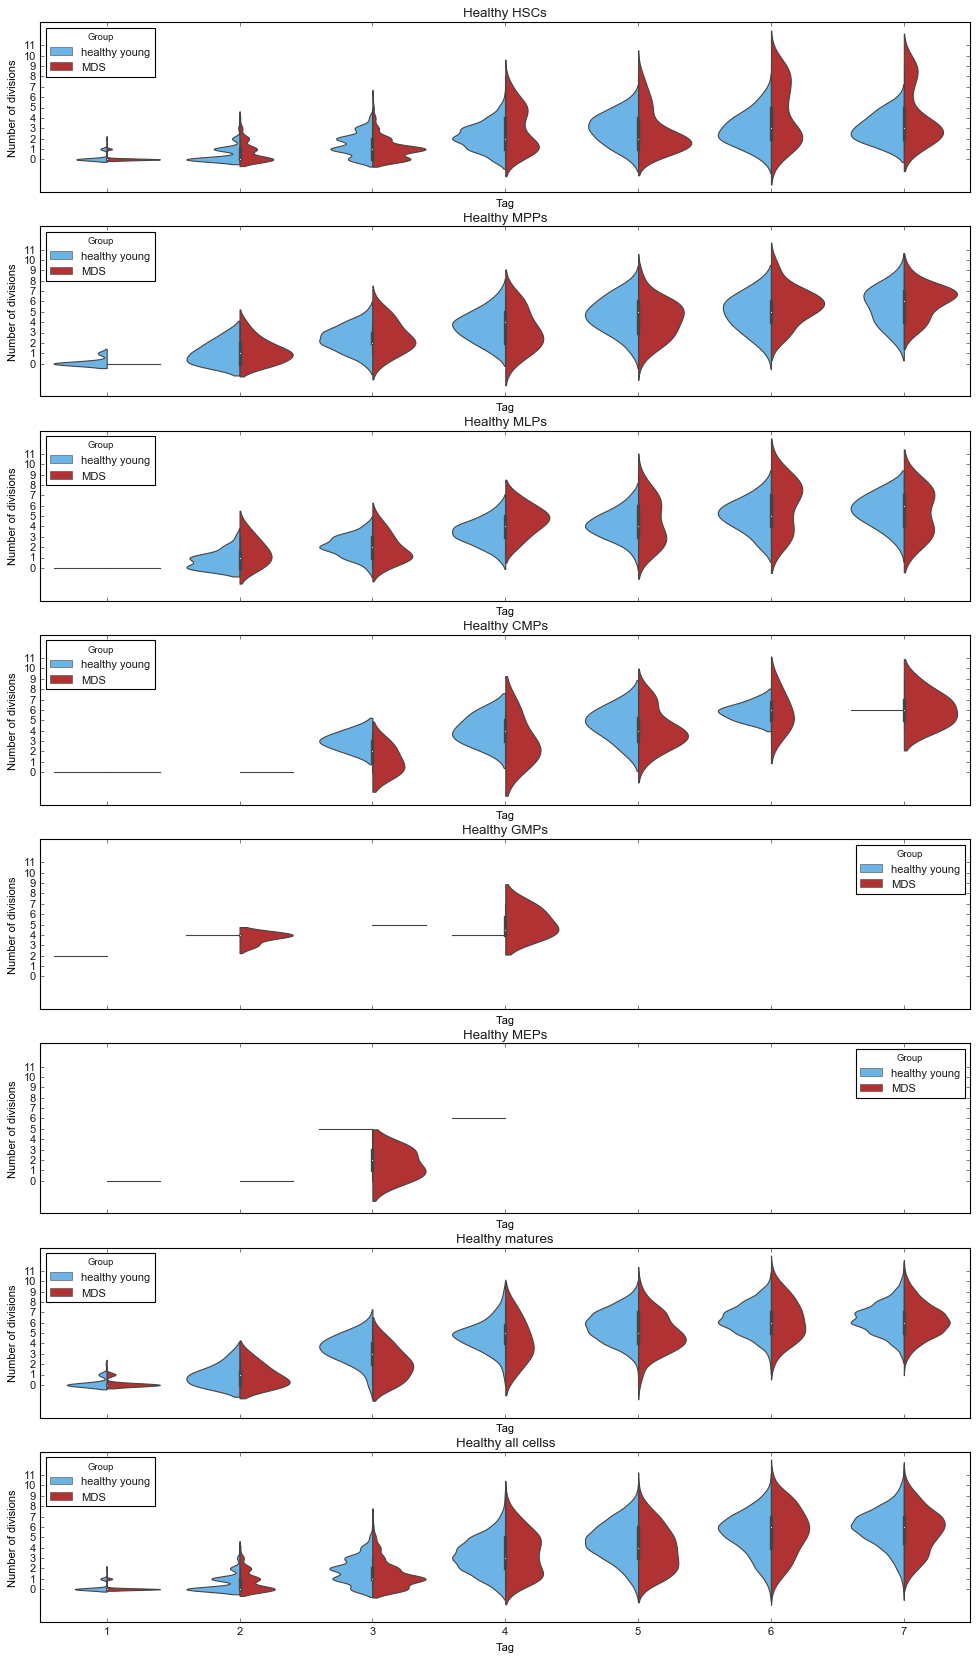

In [162]:
plotDivisionDistributionsAsViolins(df_divs_F_all,CT_str,['healthy young','MDS'],cols_H_y_vs_MDS,opt_save)

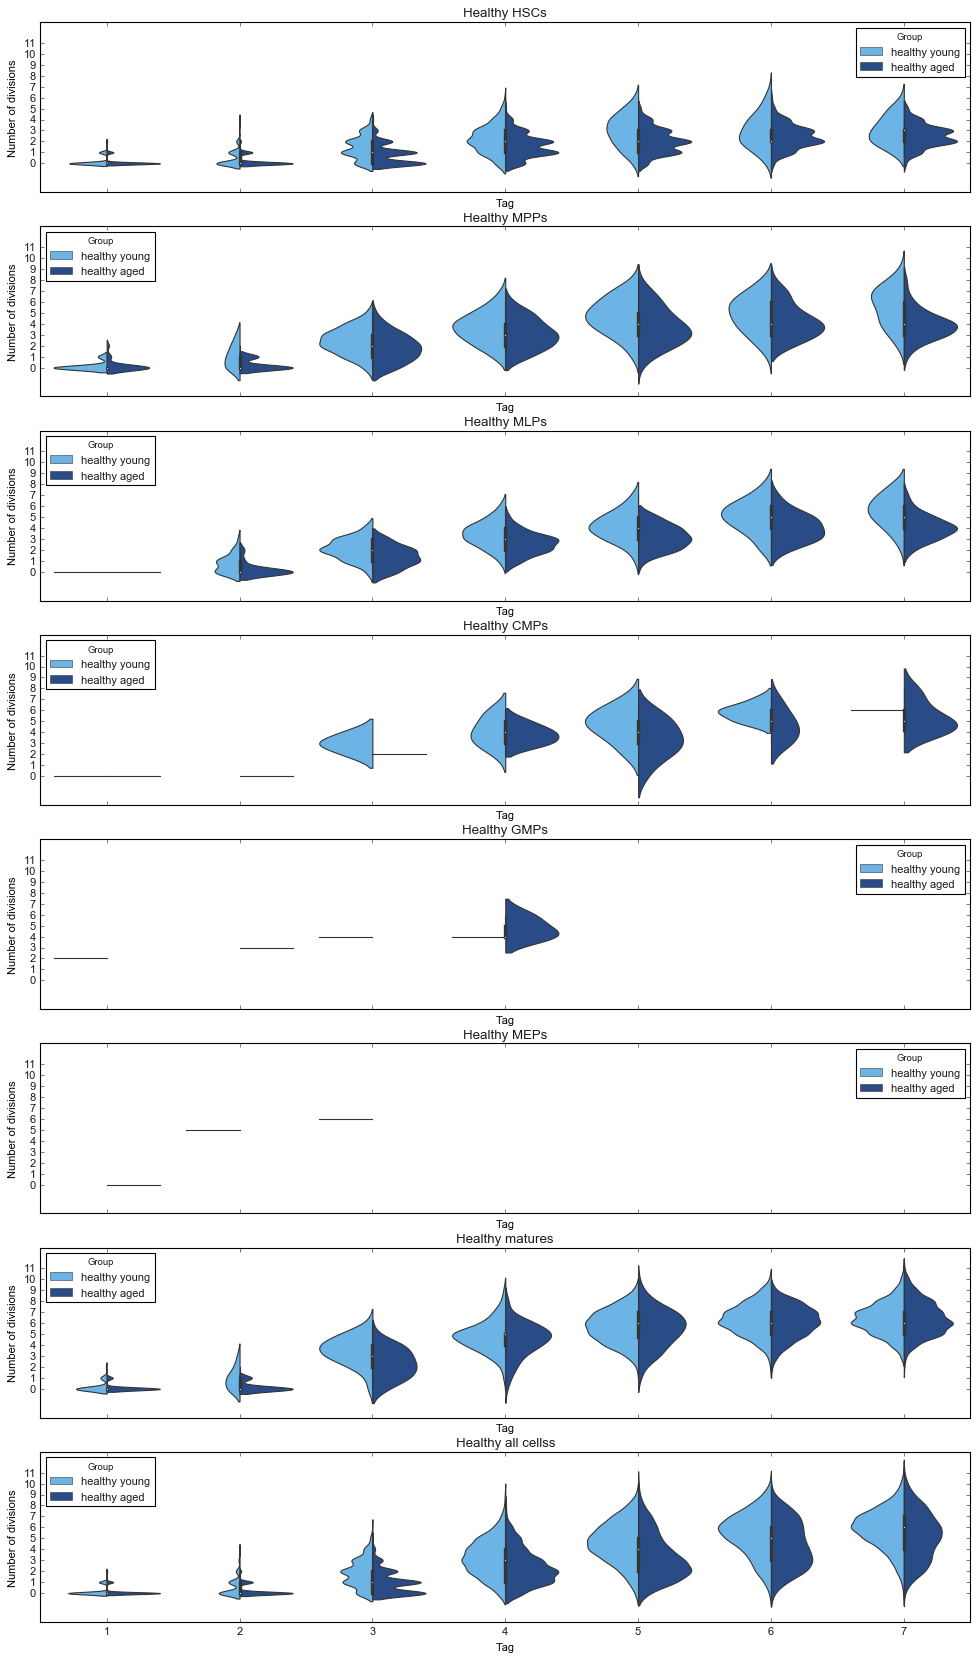

In [163]:
plotDivisionDistributionsAsViolins(df_divs_F_all,CT_str,['healthy young','healthy aged'],cols_H_y_vs_H_a,opt_save)

### Division distribution as barplots

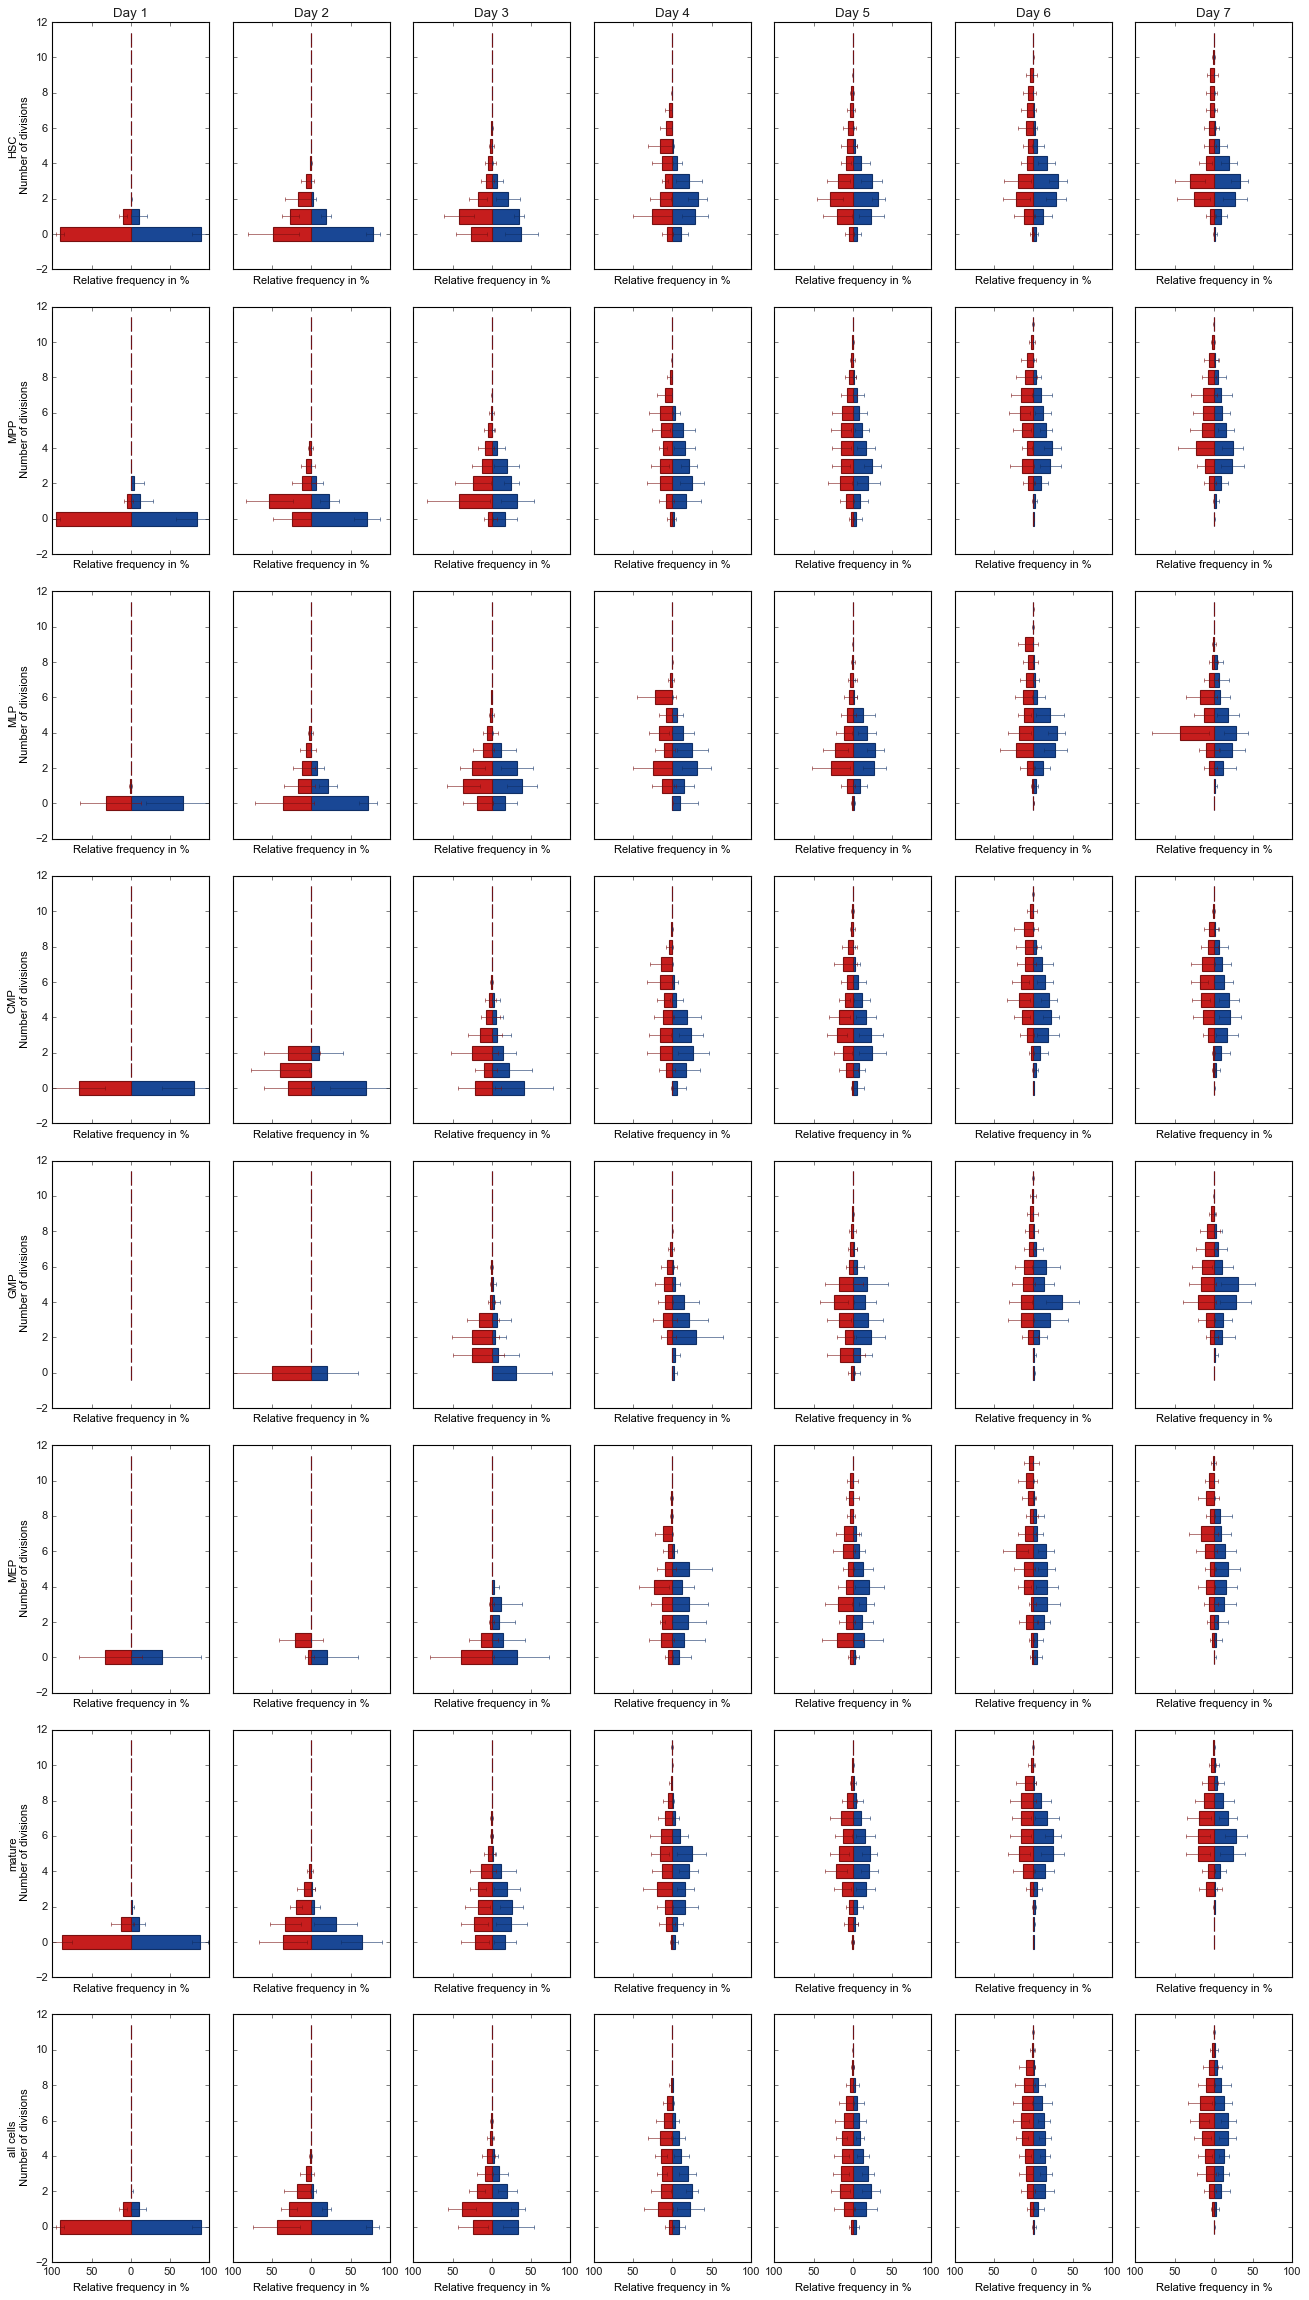

In [164]:
plotDivisionDistributionAsBars(df_divs_all,CT_str,['healthy age-matched','MDS'],cols_H_vs_MDS_light,cols_H_vs_MDS,opt_save)

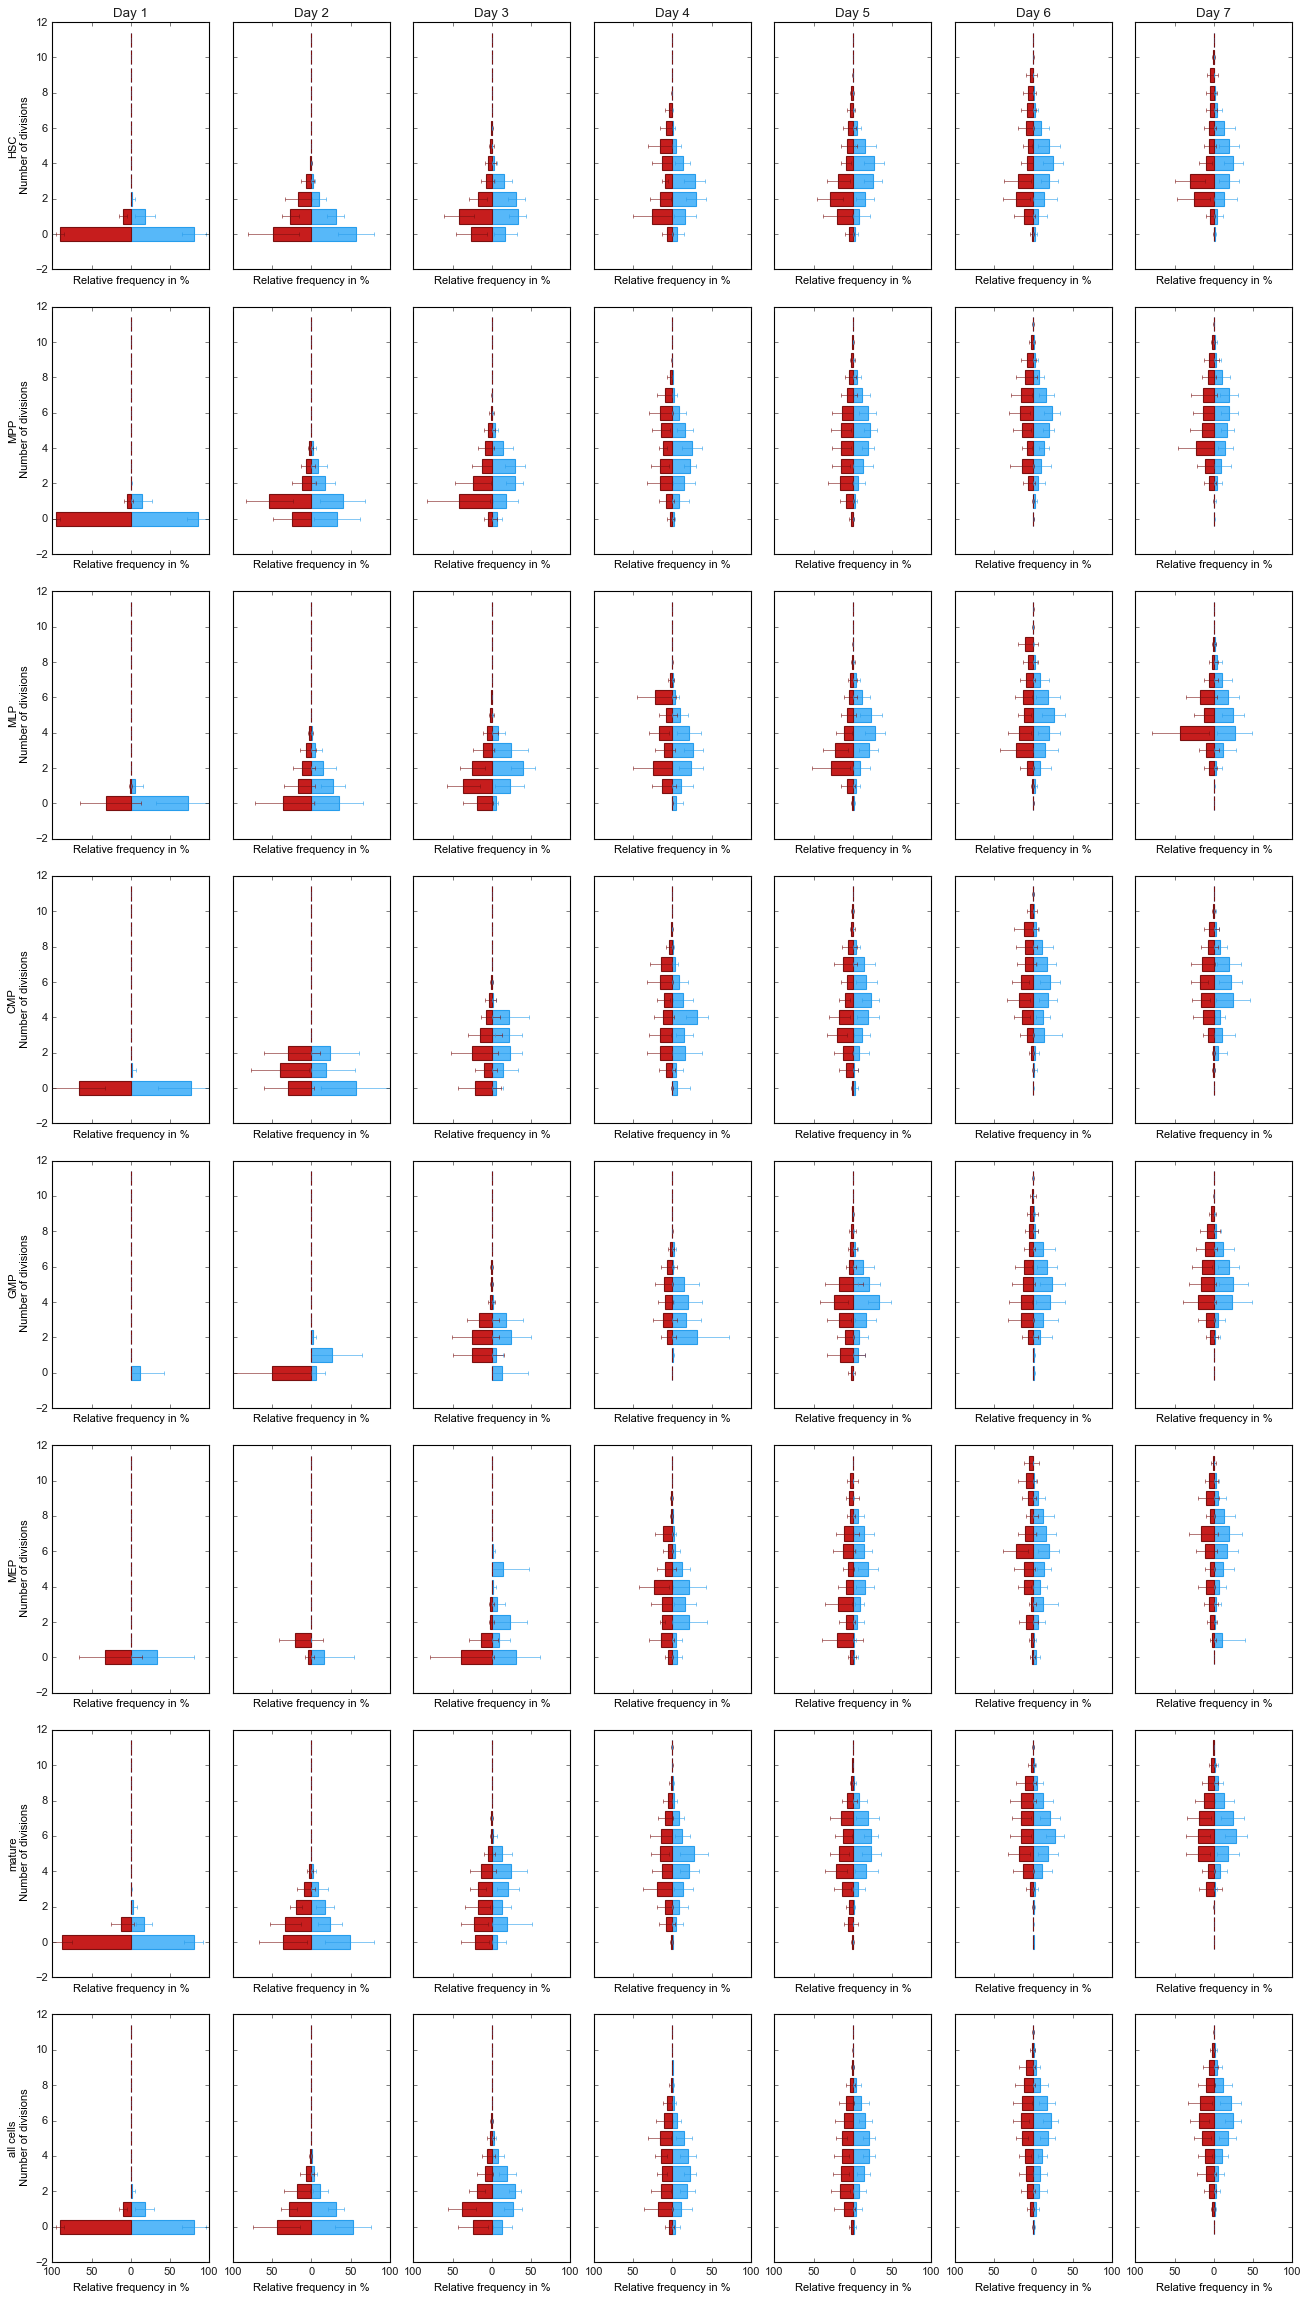

In [165]:
plotDivisionDistributionAsBars(df_divs_all,CT_str,['healthy young','MDS'],cols_H_y_vs_MDS_light,cols_H_y_vs_MDS,opt_save)

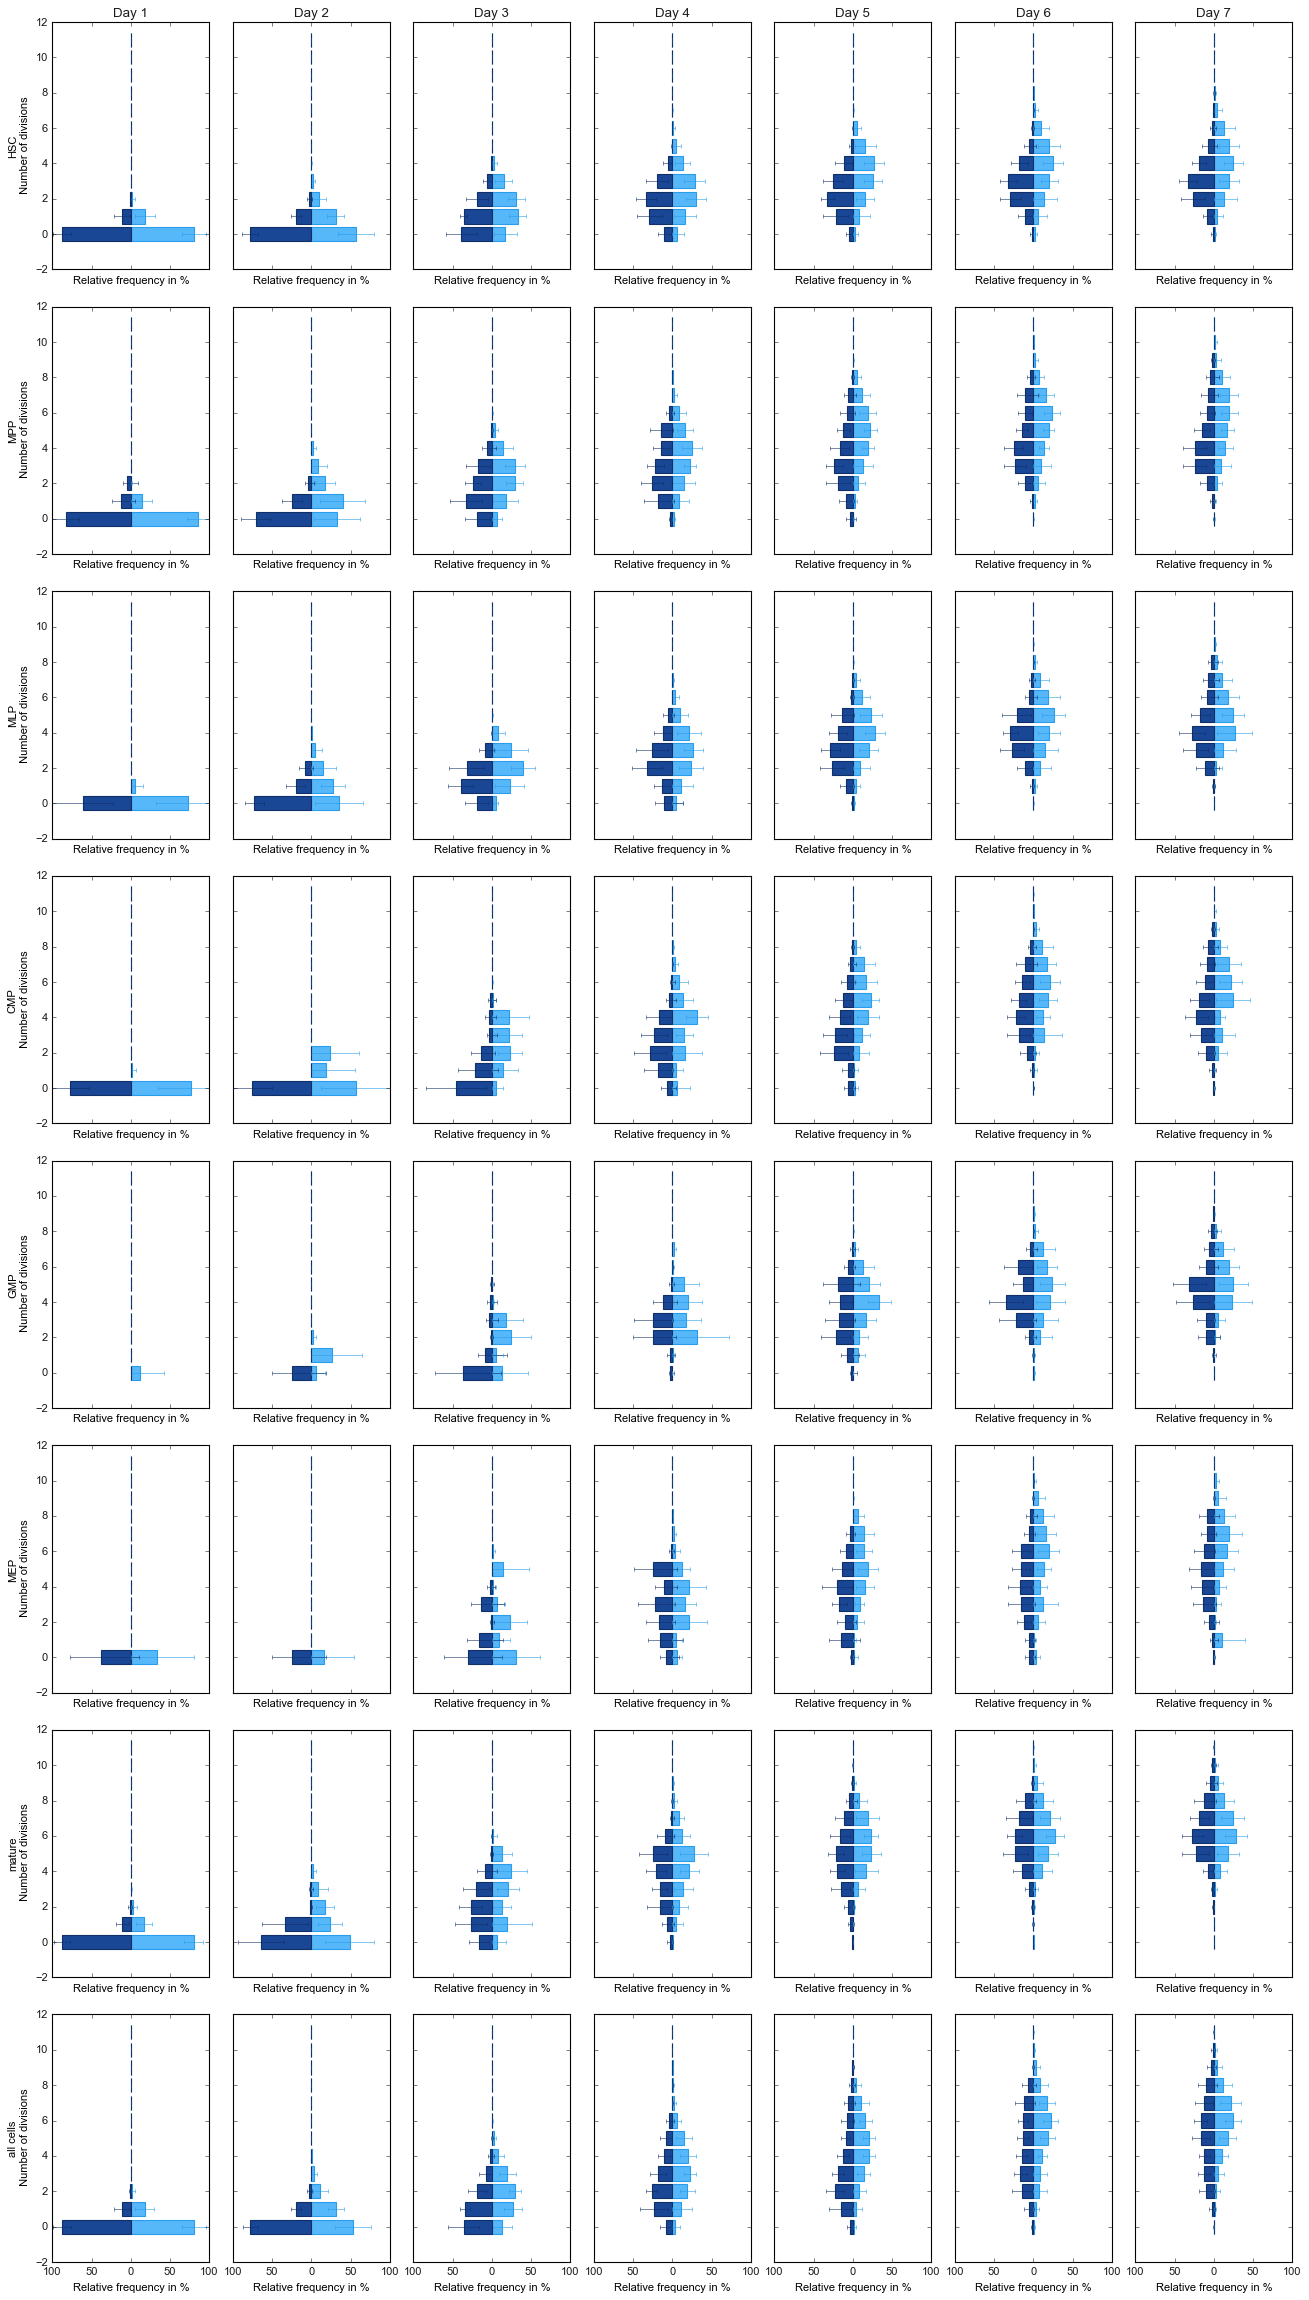

In [166]:
plotDivisionDistributionAsBars(df_divs_all,CT_str,['healthy young','healthy aged'],cols_H_y_vs_H_a_light,cols_H_y_vs_H_a,opt_save)

--> for every cell type and every day, the observed cell counts were normalized by the total number of cells observed at day 0.